In [7]:
#Predicting wine quality using ensemble technique

In [9]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [103]:
#pip install catboost

In [109]:
#pip install optuna

In [111]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

from catboost import CatBoostClassifier

from xgboost import XGBClassifier

import lightgbm as lgbm

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import optuna

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [113]:
df= pd.read_csv("data\\winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [15]:
data= pd.read_csv("data\\winequality-red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [17]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:

data.shape

(1599, 12)

In [23]:
data.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [25]:
# null values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
#duplicate values
data.duplicated().sum()


240

In [29]:
#there are 240 duplicate values which we need to remove
data.drop(index=data[data.duplicated()].index,inplace=True)
data.shape


(1359, 12)

In [31]:
#continuous and discreet variables
discreet_var=[features for features in data.columns if len(data[features].unique())<25]
print(discreet_var)
cont_var=[features for features in data.columns if features not in discreet_var]
print(cont_var)

['quality']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [33]:
#checking number of unique features
for features in data.columns:
 print(f'{features} has {len(data[features].unique())} unique features')

fixed acidity has 96 unique features
volatile acidity has 143 unique features
citric acid has 80 unique features
residual sugar has 91 unique features
chlorides has 153 unique features
free sulfur dioxide has 60 unique features
total sulfur dioxide has 144 unique features
density has 436 unique features
pH has 89 unique features
sulphates has 96 unique features
alcohol has 65 unique features
quality has 6 unique features


In [35]:
#Graphical Analysis


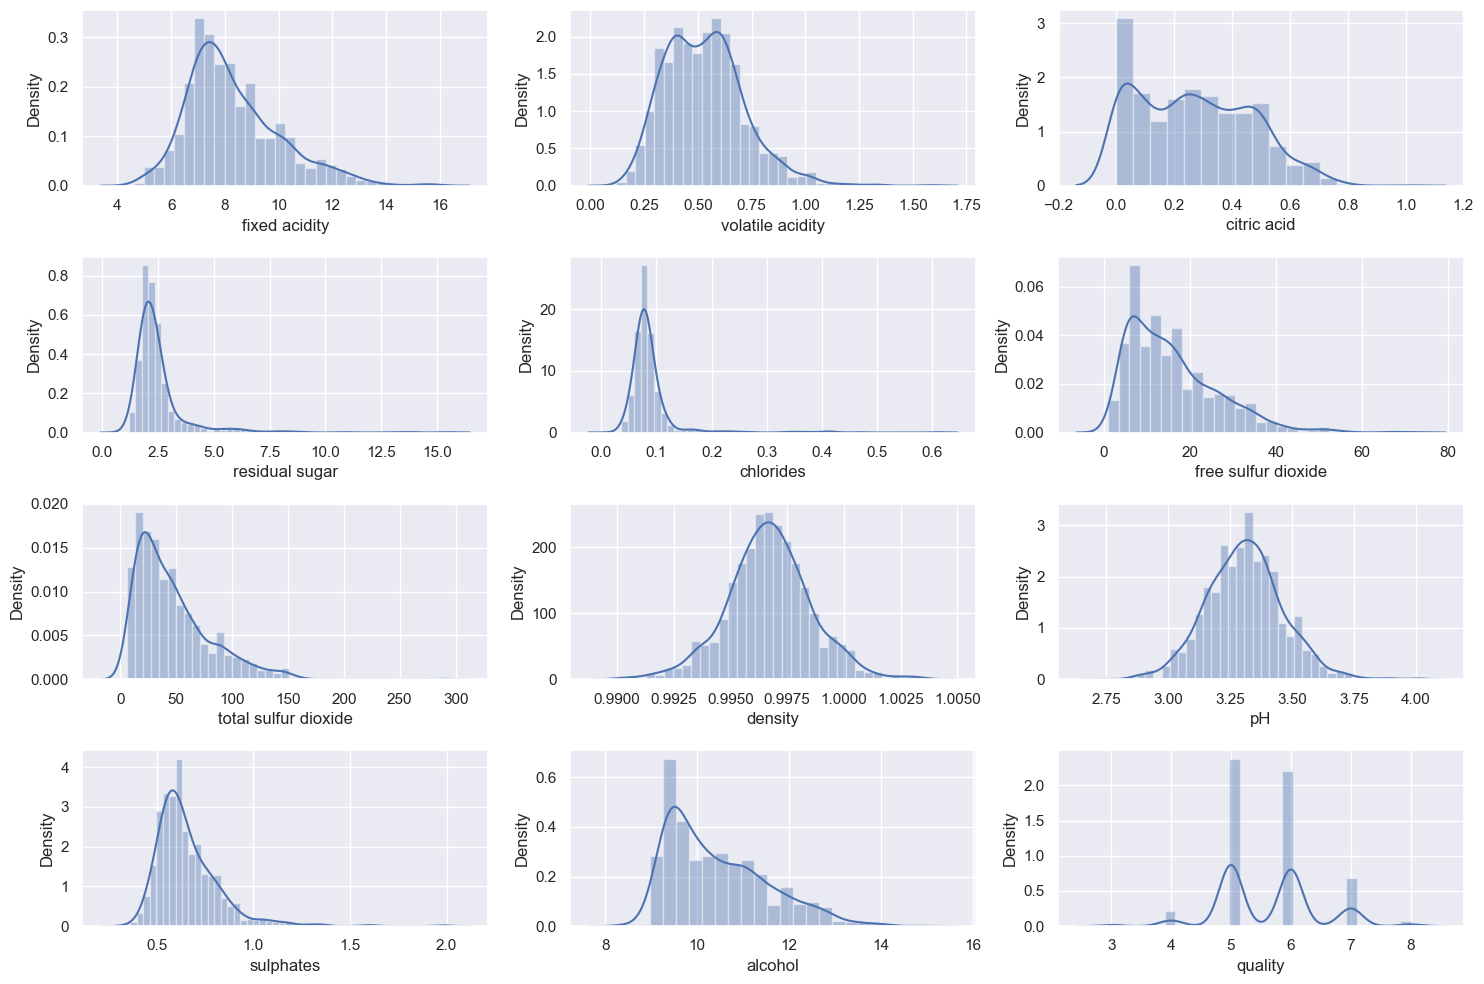

In [37]:
## checking distribution of the dataset
sns.set(rc={'figure.figsize':(15,10)})
pn=1
for features in data:
 plt.subplot(4,3,pn)
 sns.distplot(data[features],kde=True,color='b')
 pn+=1
 plt.xlabel(features)
 plt.tight_layout()


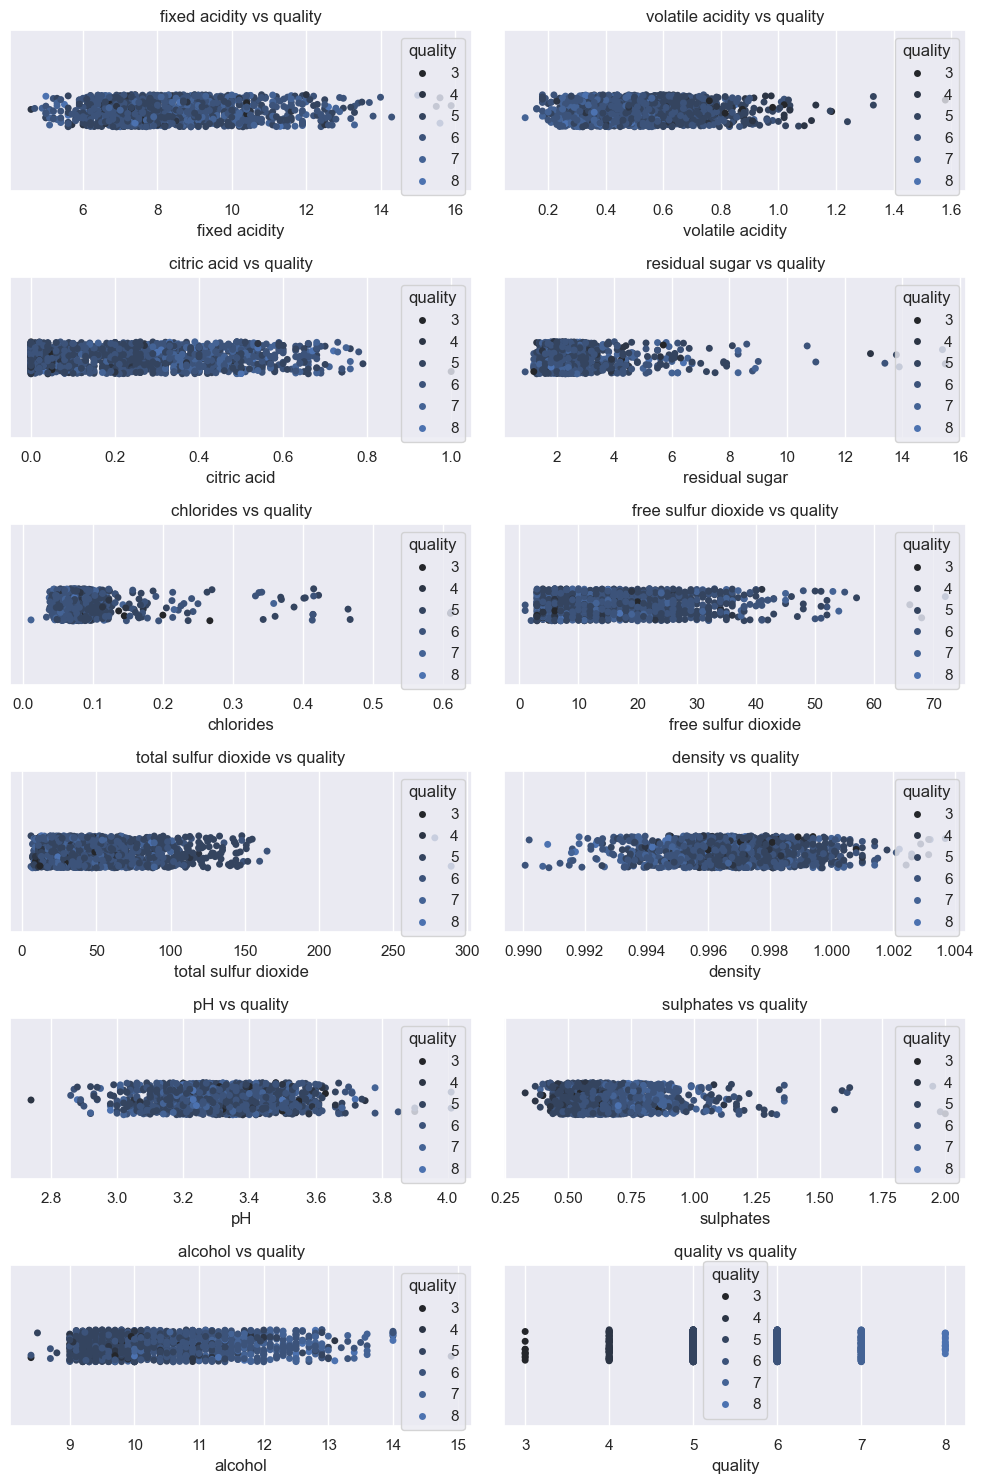

In [65]:
## Comparing the features against target feature 'quality'
sns.set(rc={'figure.figsize':(10,15)})
pn=1
for features in data:
    plt.subplot(6,2,pn)
    sns.stripplot(data=data,x=data[features],hue=data['quality'],color='b')
    pn+=1
    plt.title(f'{features} vs quality')
    plt.xlabel(features)
    plt.tight_layout()


In [67]:
#Correlation
data.corr()


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

<Axes: >

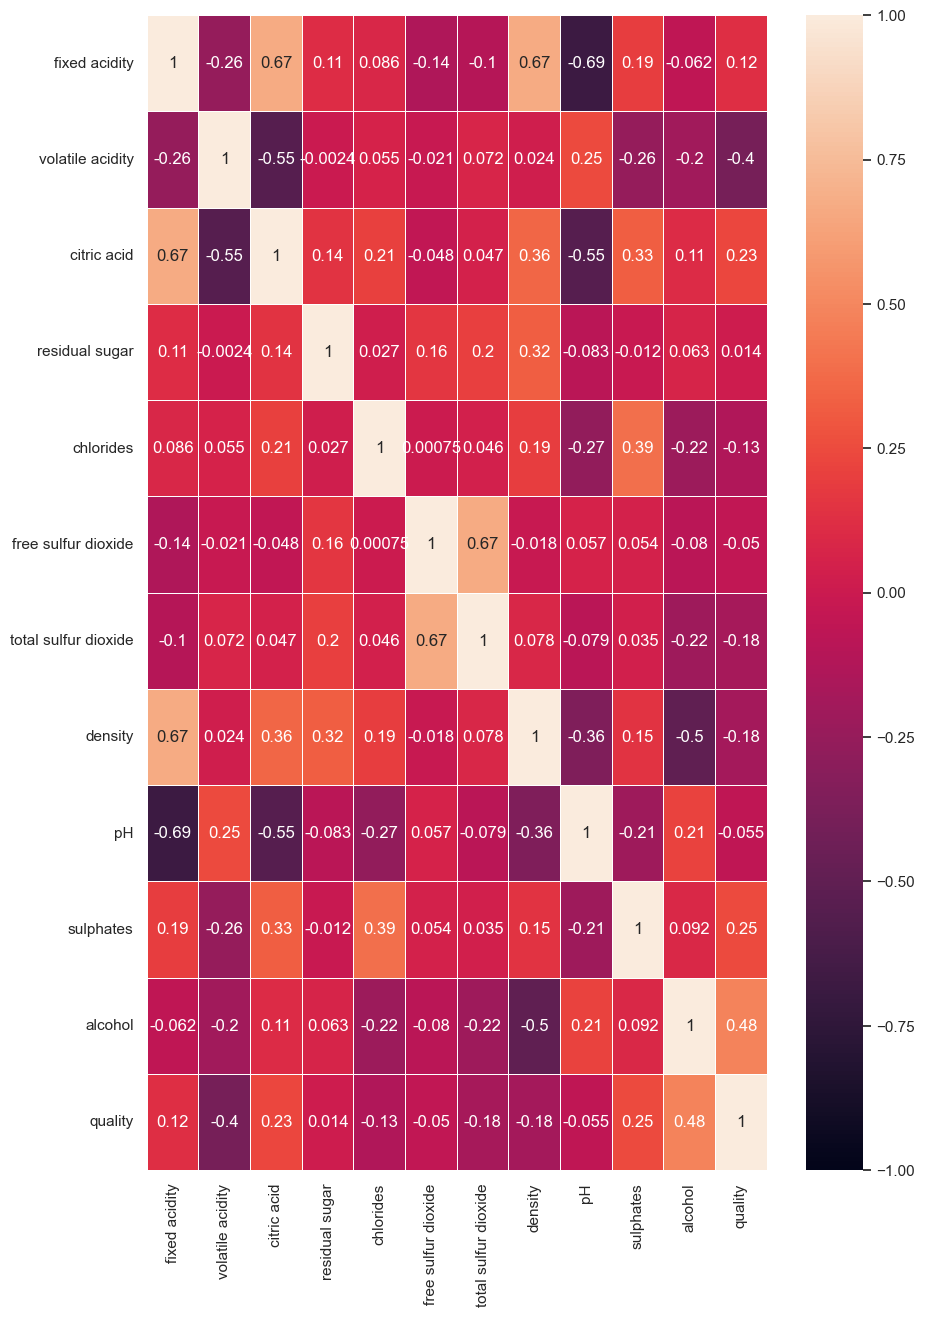

In [69]:
#visualising the correlation using heatmap
sns.heatmap(data=data.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.5)

In [71]:
#Outliers Handling

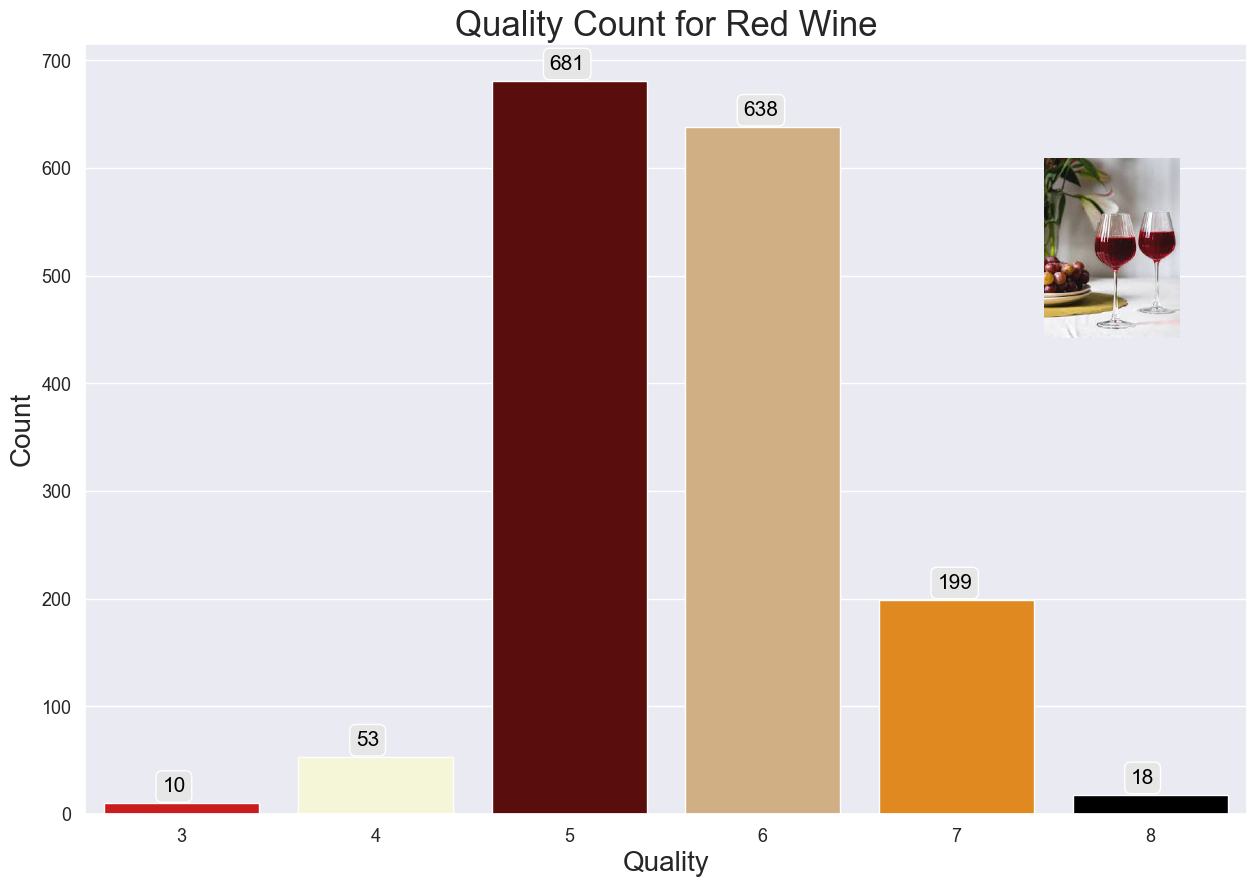

In [133]:
wine_glass = mpimg.imread('data\\wine.jpg')
imagebox = OffsetImage(wine_glass, zoom = 0.5)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy, frameon = False, pad = 1, xybox = (4.8, 525))

plt.figure(figsize = (15, 10))
ax = sns.countplot(data = df, x = 'quality', palette = ['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black'])
ax.add_artist(ab)

bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 10.5),
                   color = 'black',
                   bbox = bbox_args,
                   fontsize = 15)
        
plt.title('Quality Count for Red Wine', fontsize = 25)
plt.xlabel('Quality', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

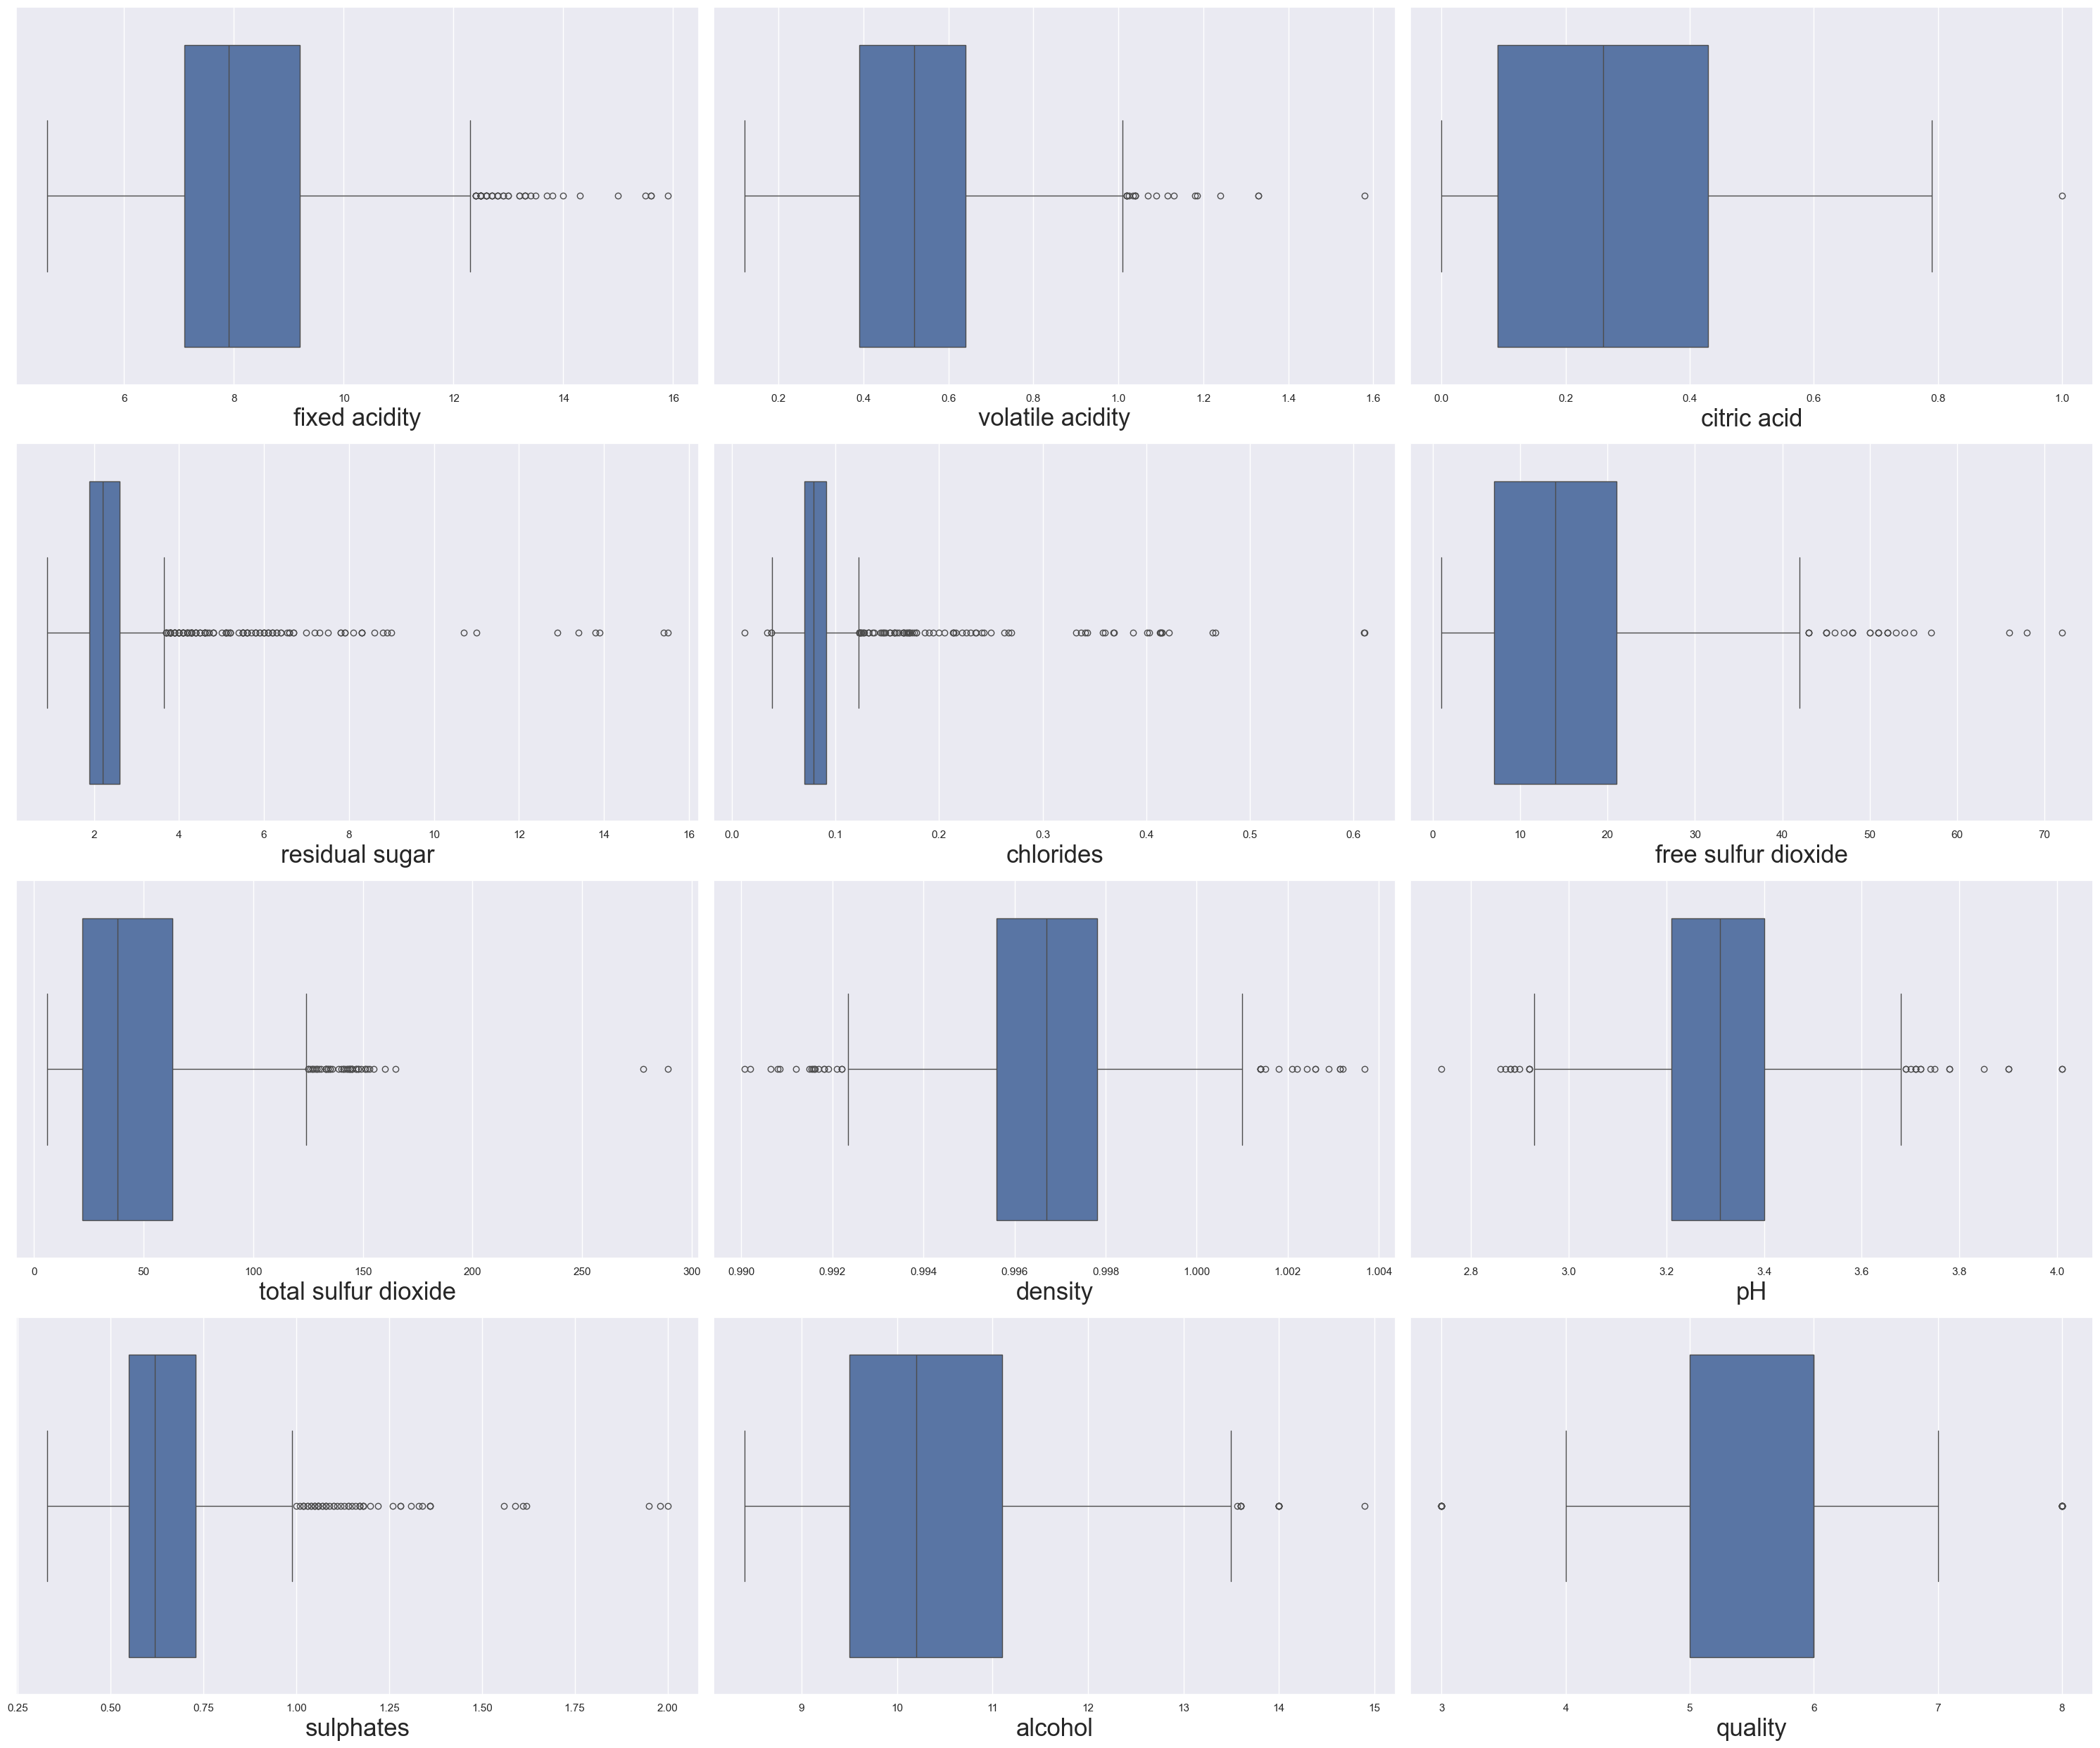

In [73]:
sns.set(rc={'figure.figsize':(30,25)})
pn=1
for features in data:
 plt.subplot(4,3,pn)
 sns.boxplot(x=features,data=data,color='b')
 pn+=1
 plt.xlabel(features,fontsize=25)
 plt.tight_layout()


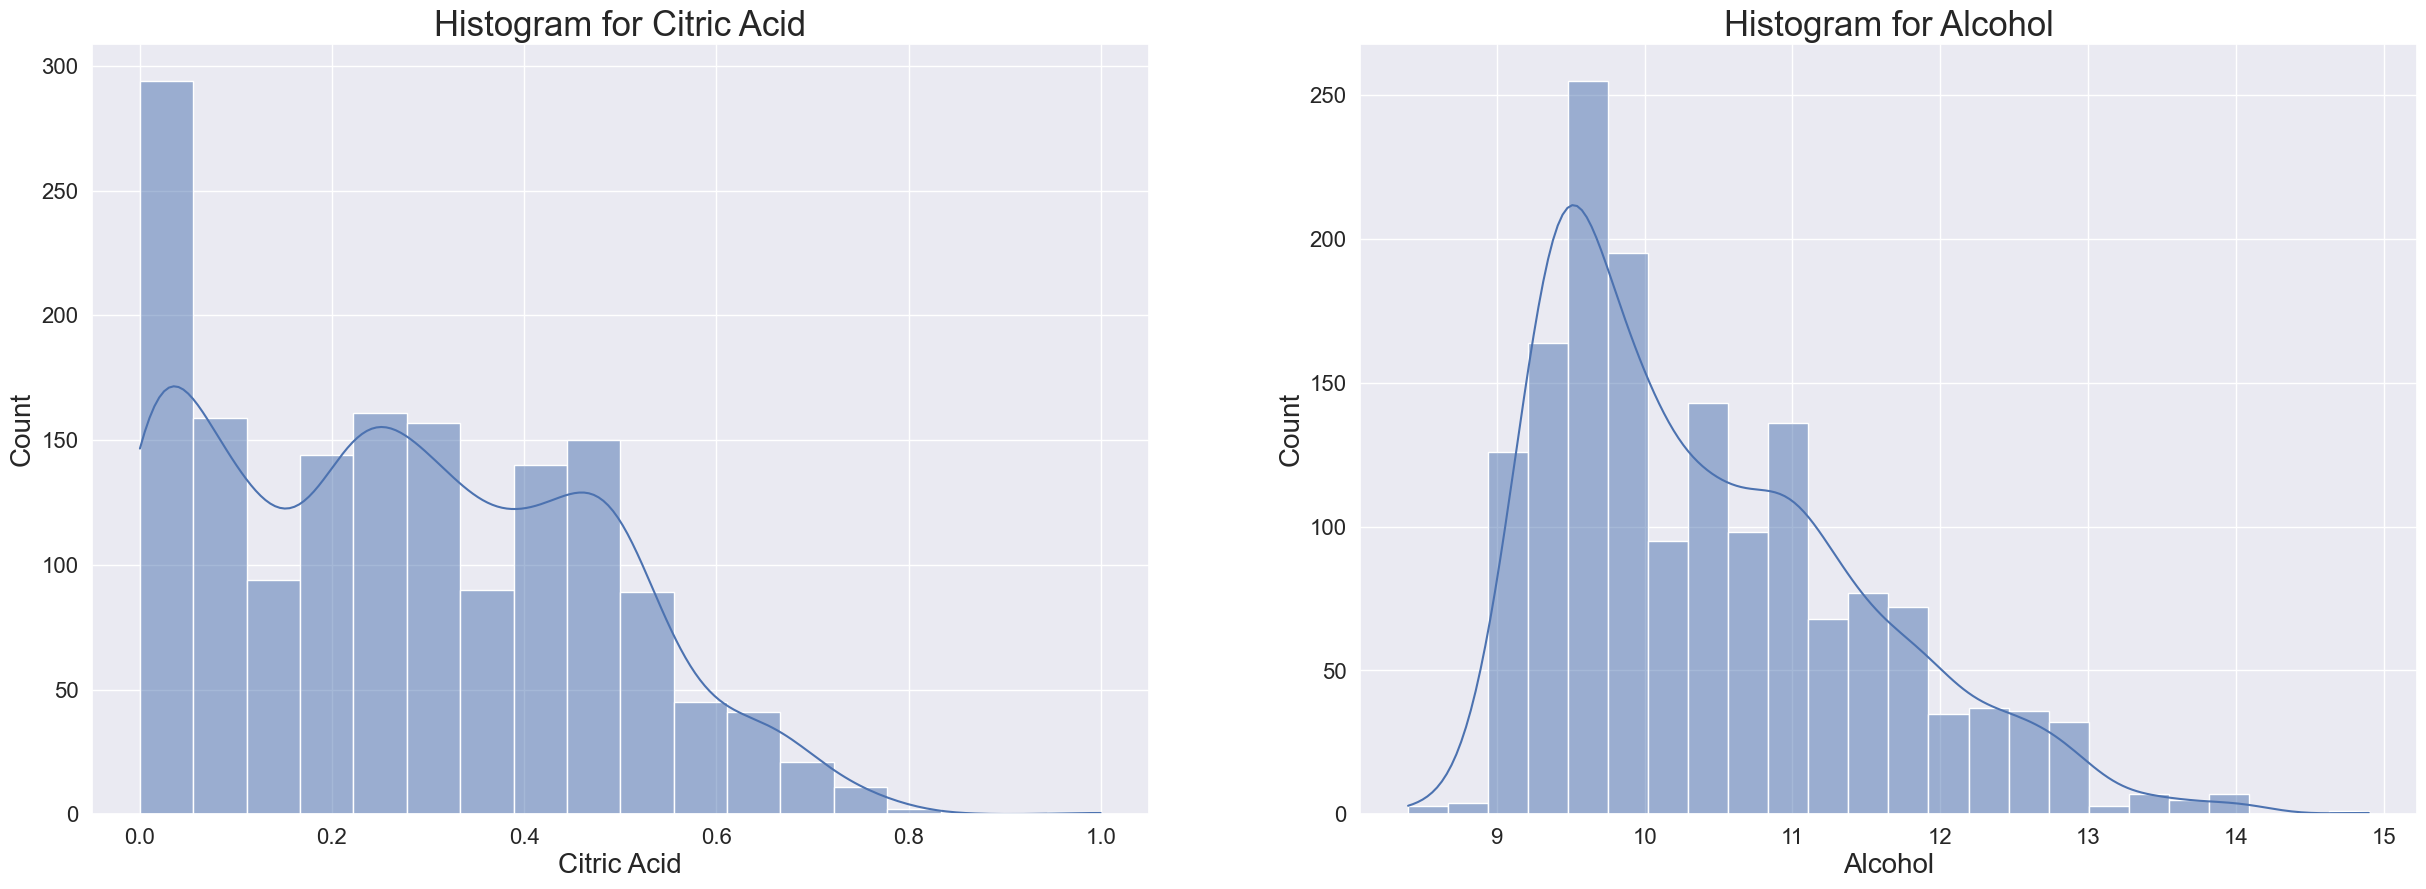

In [115]:
fig, axes = plt.subplots(ncols = 2, figsize = (30, 10))

sns.histplot(data = df, x = 'citric acid', kde = True, ax = axes[0])
axes[0].set_title('Histogram for Citric Acid', fontsize = 25)
axes[0].set_xlabel('Citric Acid', fontsize = 20)
axes[0].set_ylabel('Count', fontsize = 20)
axes[0].xaxis.set_tick_params(labelsize = 16)
axes[0].yaxis.set_tick_params(labelsize = 16)

sns.histplot(data = df, x = 'alcohol', kde = True, ax = axes[1])
axes[1].set_title('Histogram for Alcohol', fontsize = 25)
axes[1].set_xlabel('Alcohol', fontsize = 20)
axes[1].set_ylabel('Count', fontsize = 20)
axes[1].xaxis.set_tick_params(labelsize = 16)
axes[1].yaxis.set_tick_params(labelsize = 16)

plt.show()

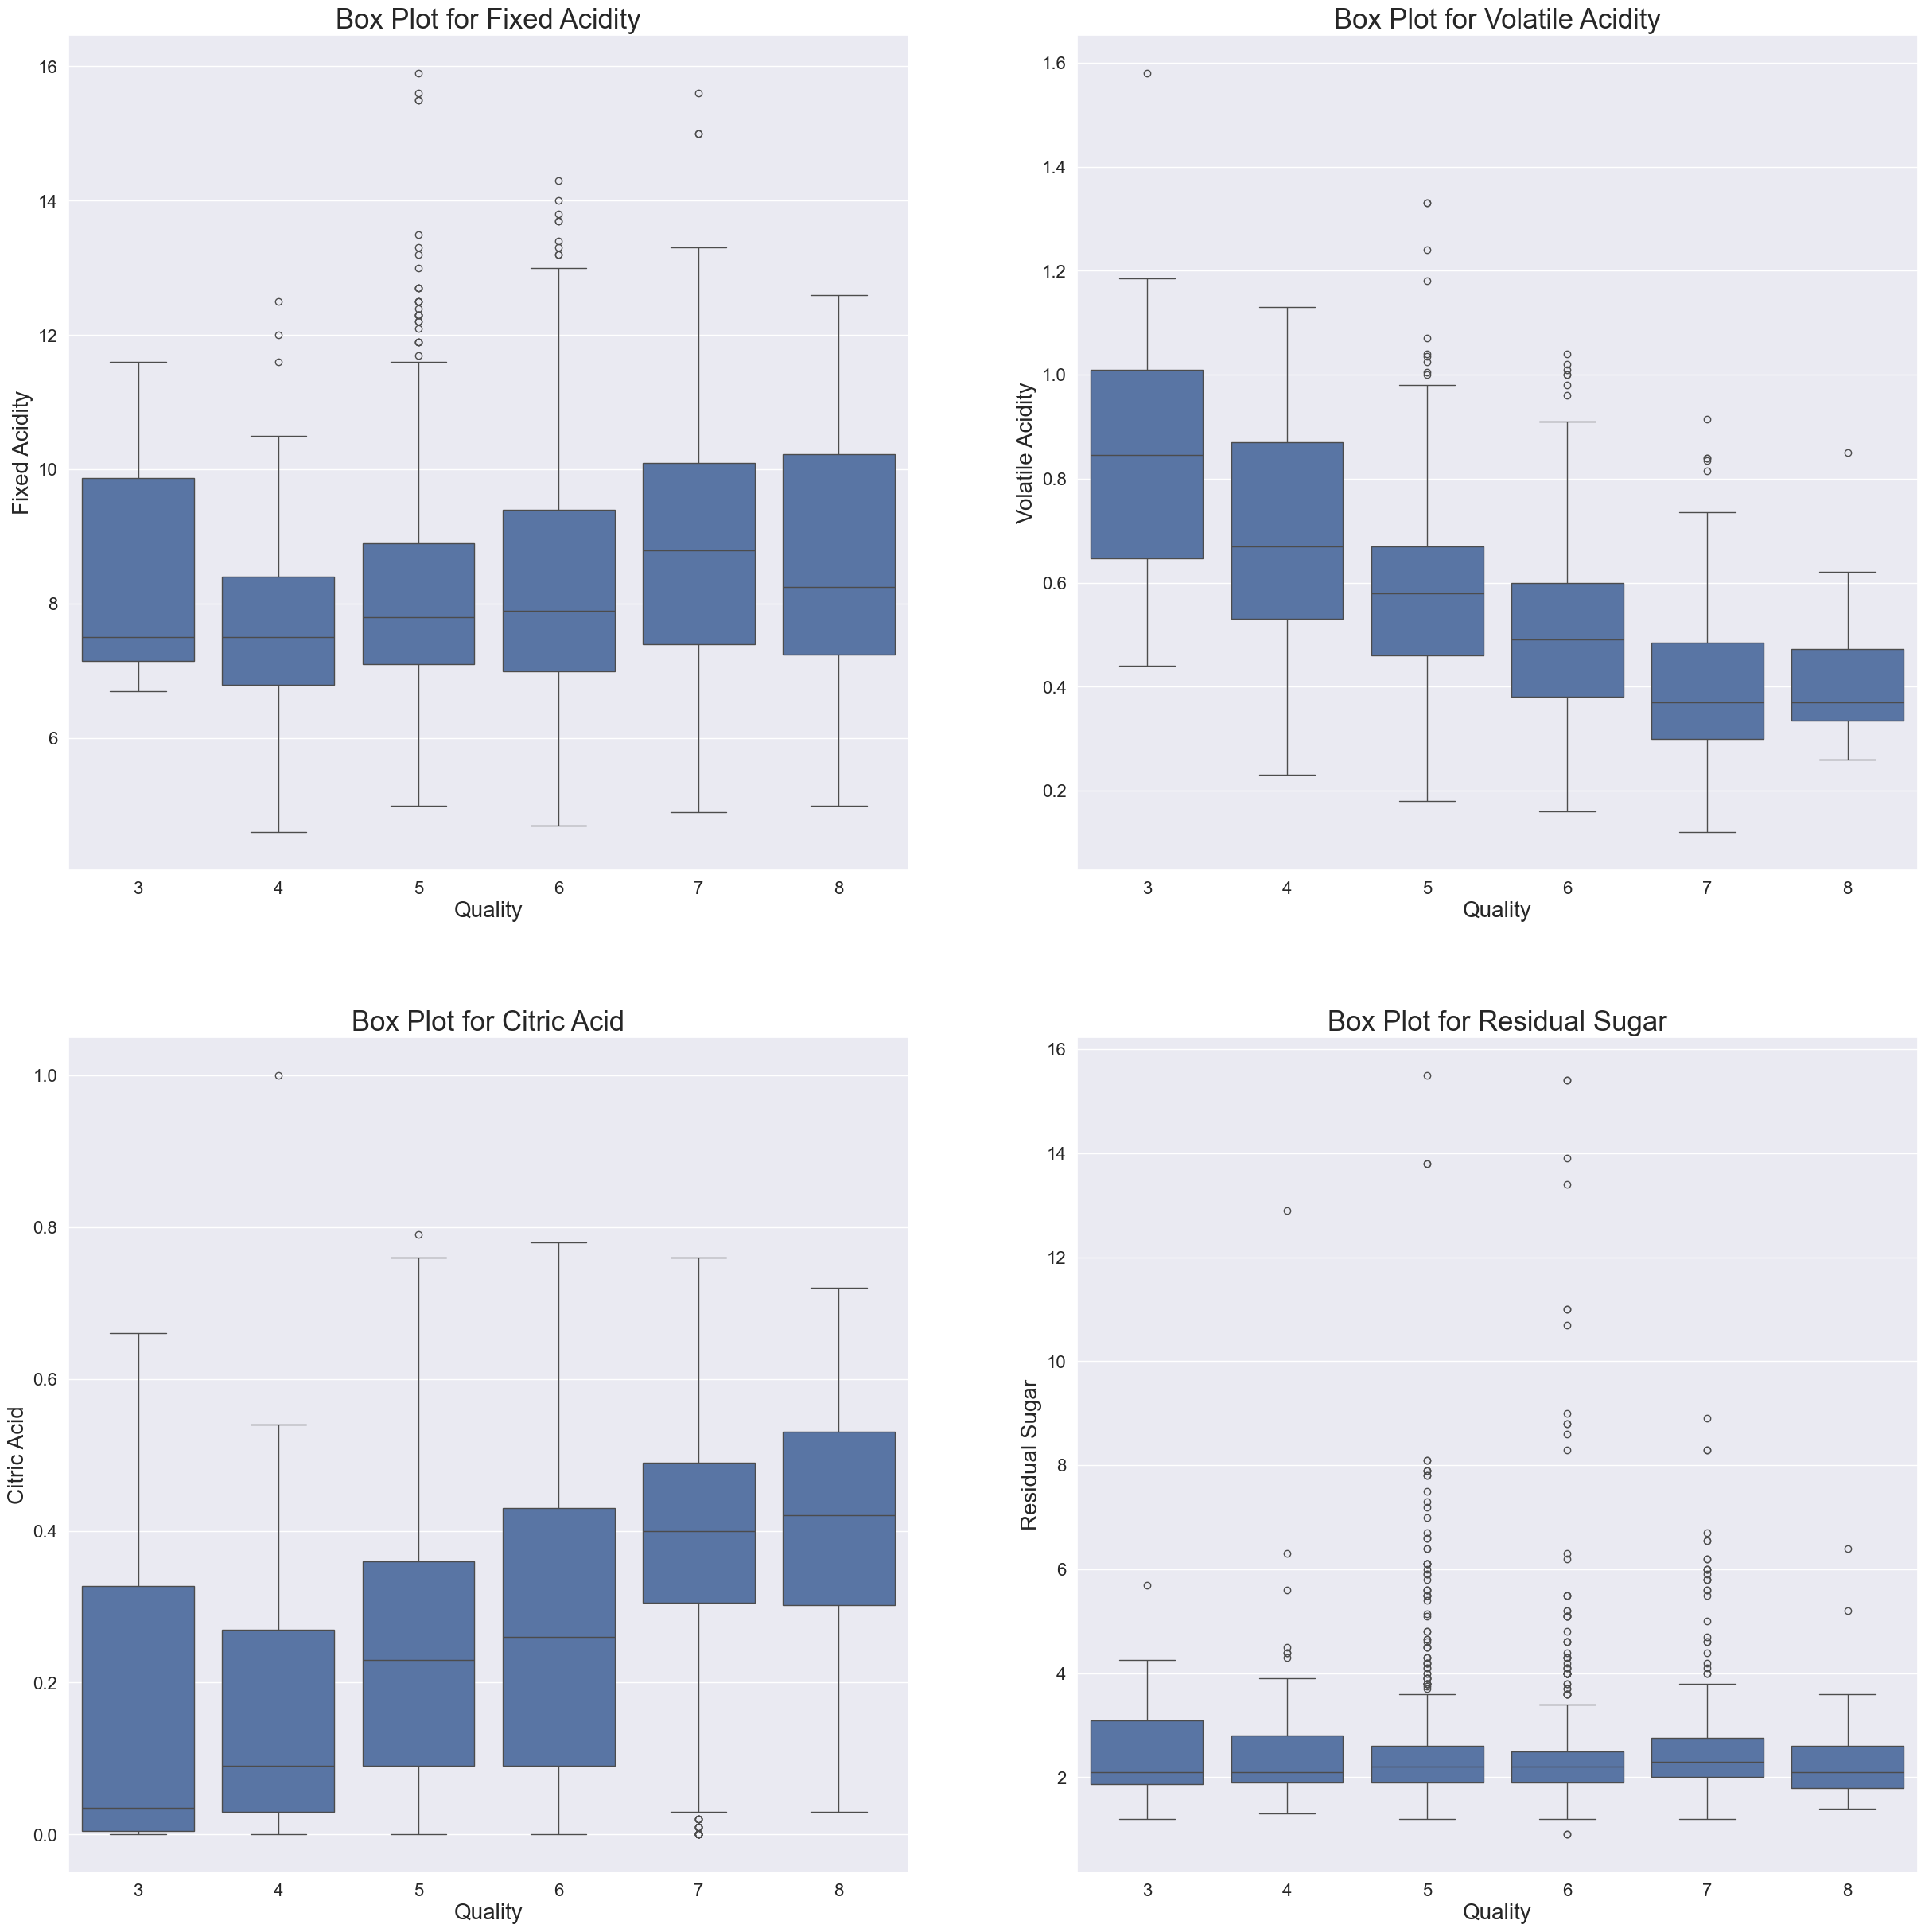

In [117]:
plt.figure(figsize = (30, 30))

def create_boxplot(feature):
    sns.boxplot(data = df, x = df['quality'], y = feature)
    plt.title('Box Plot for ' + feature.title(), fontsize = 25)
    plt.xlabel('Quality', fontsize = 20)
    plt.ylabel(feature.title(), fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    
plt.subplot(221)
create_boxplot('fixed acidity')

plt.subplot(222)
create_boxplot('volatile acidity')

plt.subplot(223)
create_boxplot('citric acid')

plt.subplot(224)
create_boxplot('residual sugar')

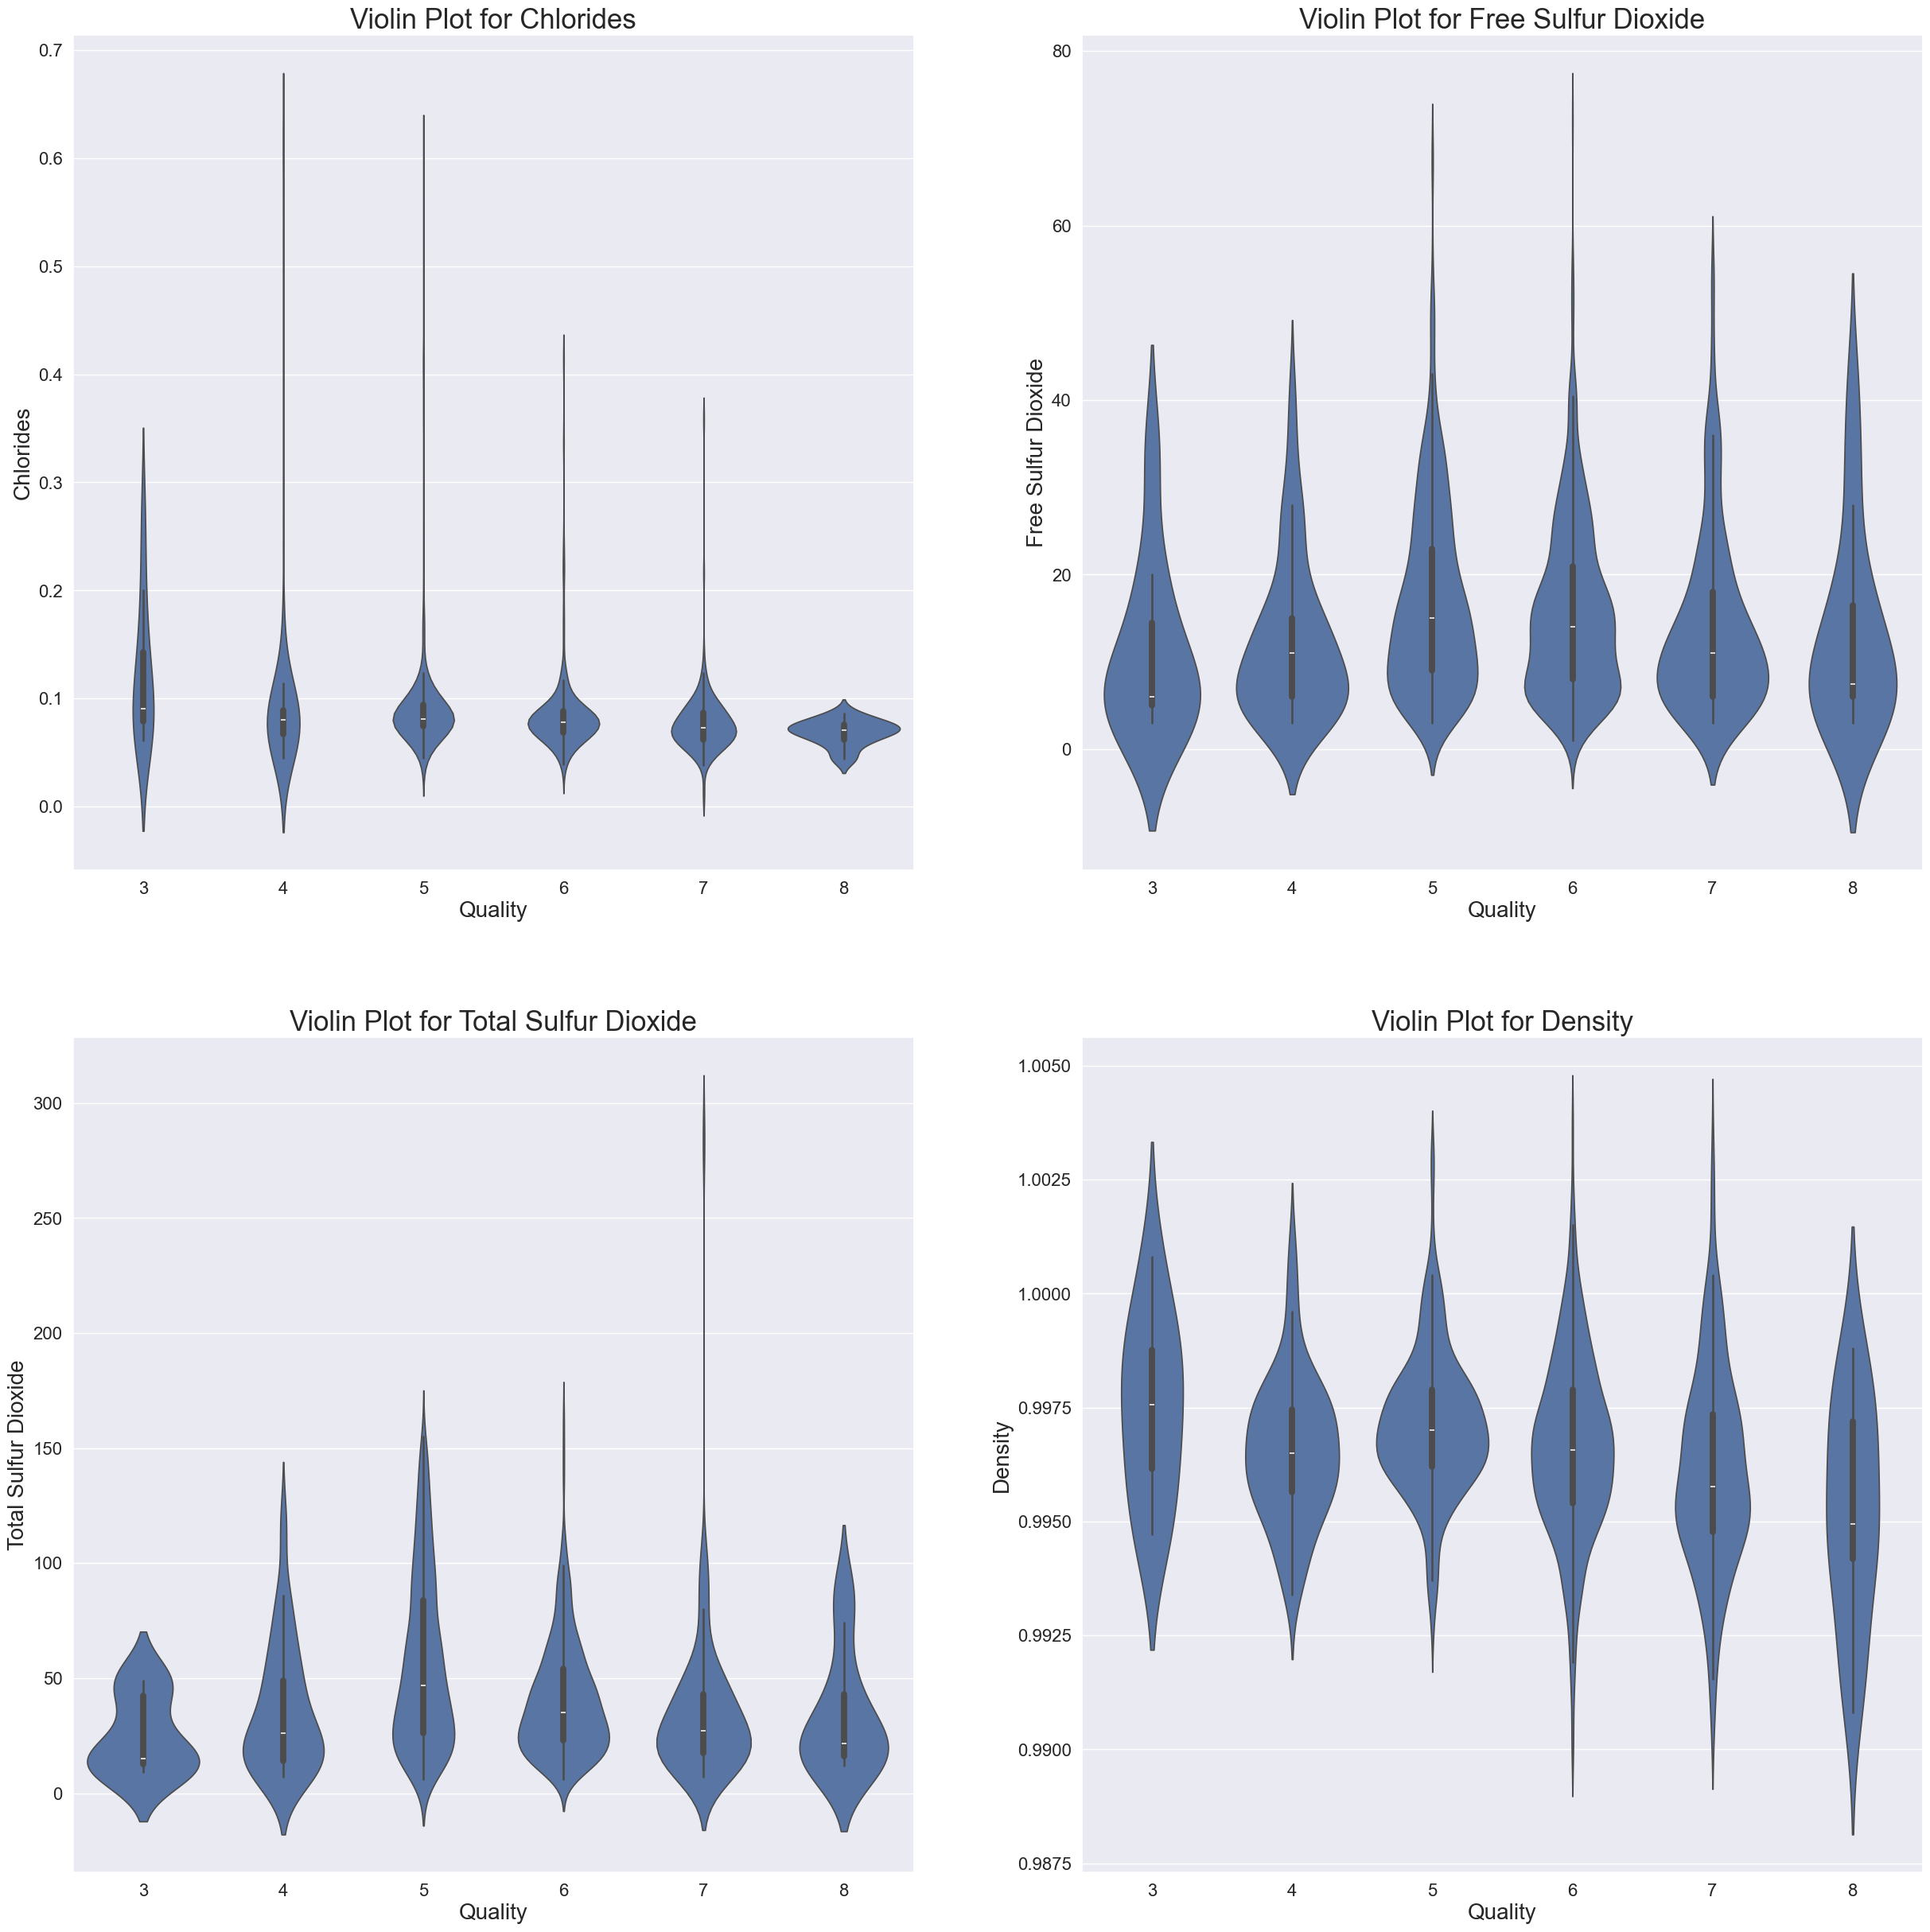

In [119]:
plt.figure(figsize = (30, 30))

def create_violinplot(feature):
    sns.violinplot(data = df, x = df['quality'], y = feature)
    plt.title('Violin Plot for ' + feature.title(), fontsize = 25)
    plt.xlabel('Quality', fontsize = 20)
    plt.ylabel(feature.title(), fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    
plt.subplot(221)
create_violinplot('chlorides')

plt.subplot(222)
create_violinplot('free sulfur dioxide')

plt.subplot(223)
create_violinplot('total sulfur dioxide')

plt.subplot(224)
create_violinplot('density')

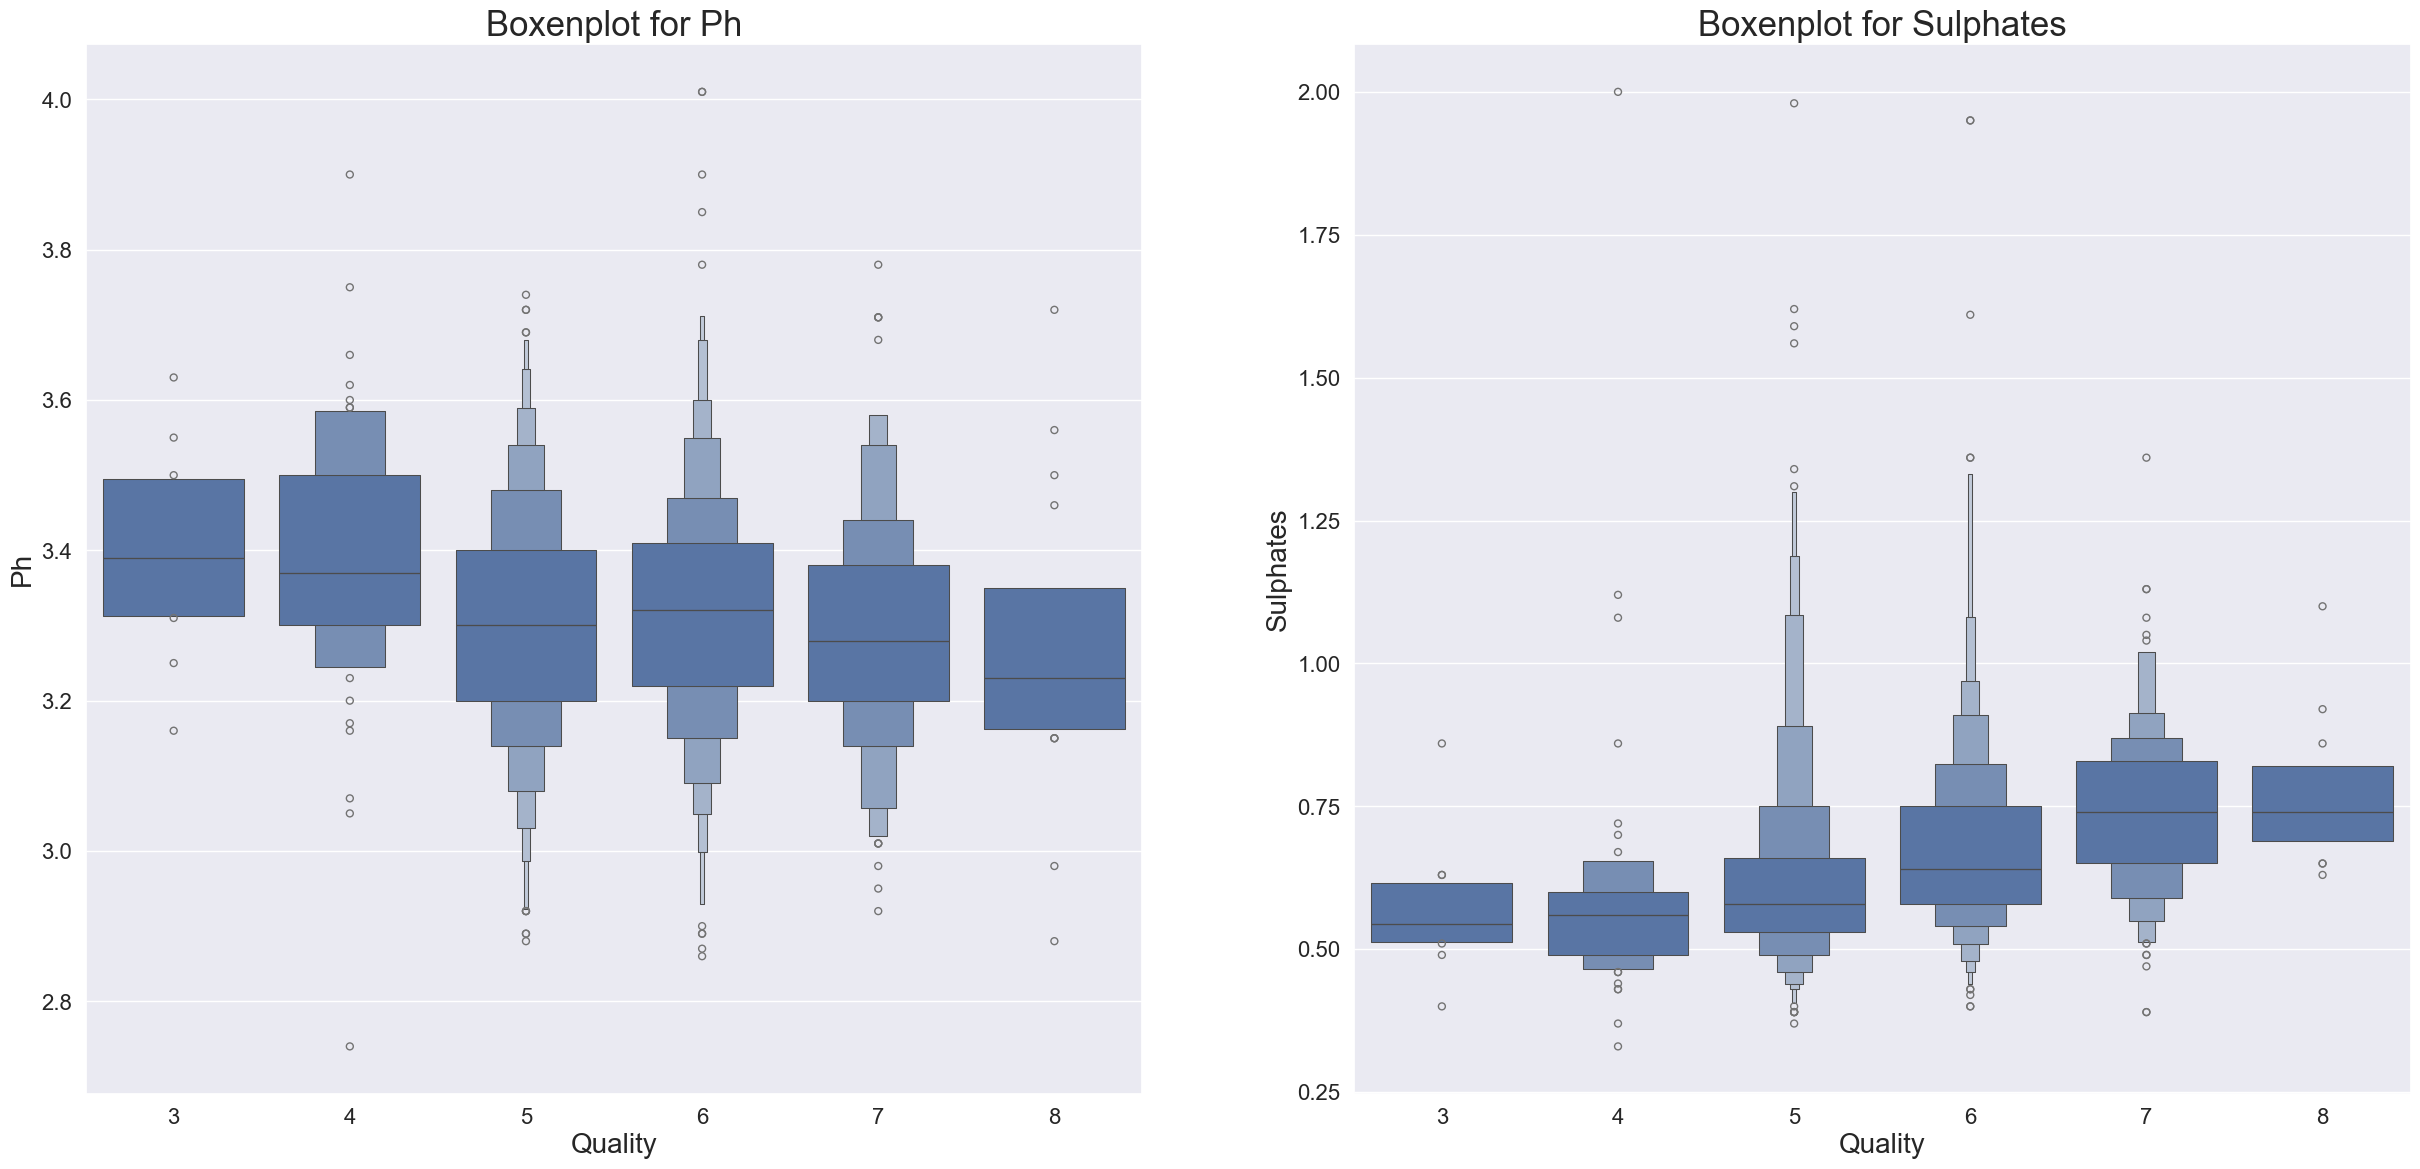

In [121]:
plt.figure(figsize = (30, 30))

def create_boxenplot(feature):
    sns.boxenplot(data = df, x = df['quality'], y = feature)
    plt.title('Boxenplot for ' + feature.title(), fontsize = 25)
    plt.xlabel('Quality', fontsize = 20)
    plt.ylabel(feature.title(), fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    
plt.subplot(221)
create_boxenplot('pH')

plt.subplot(222)
create_boxenplot('sulphates')

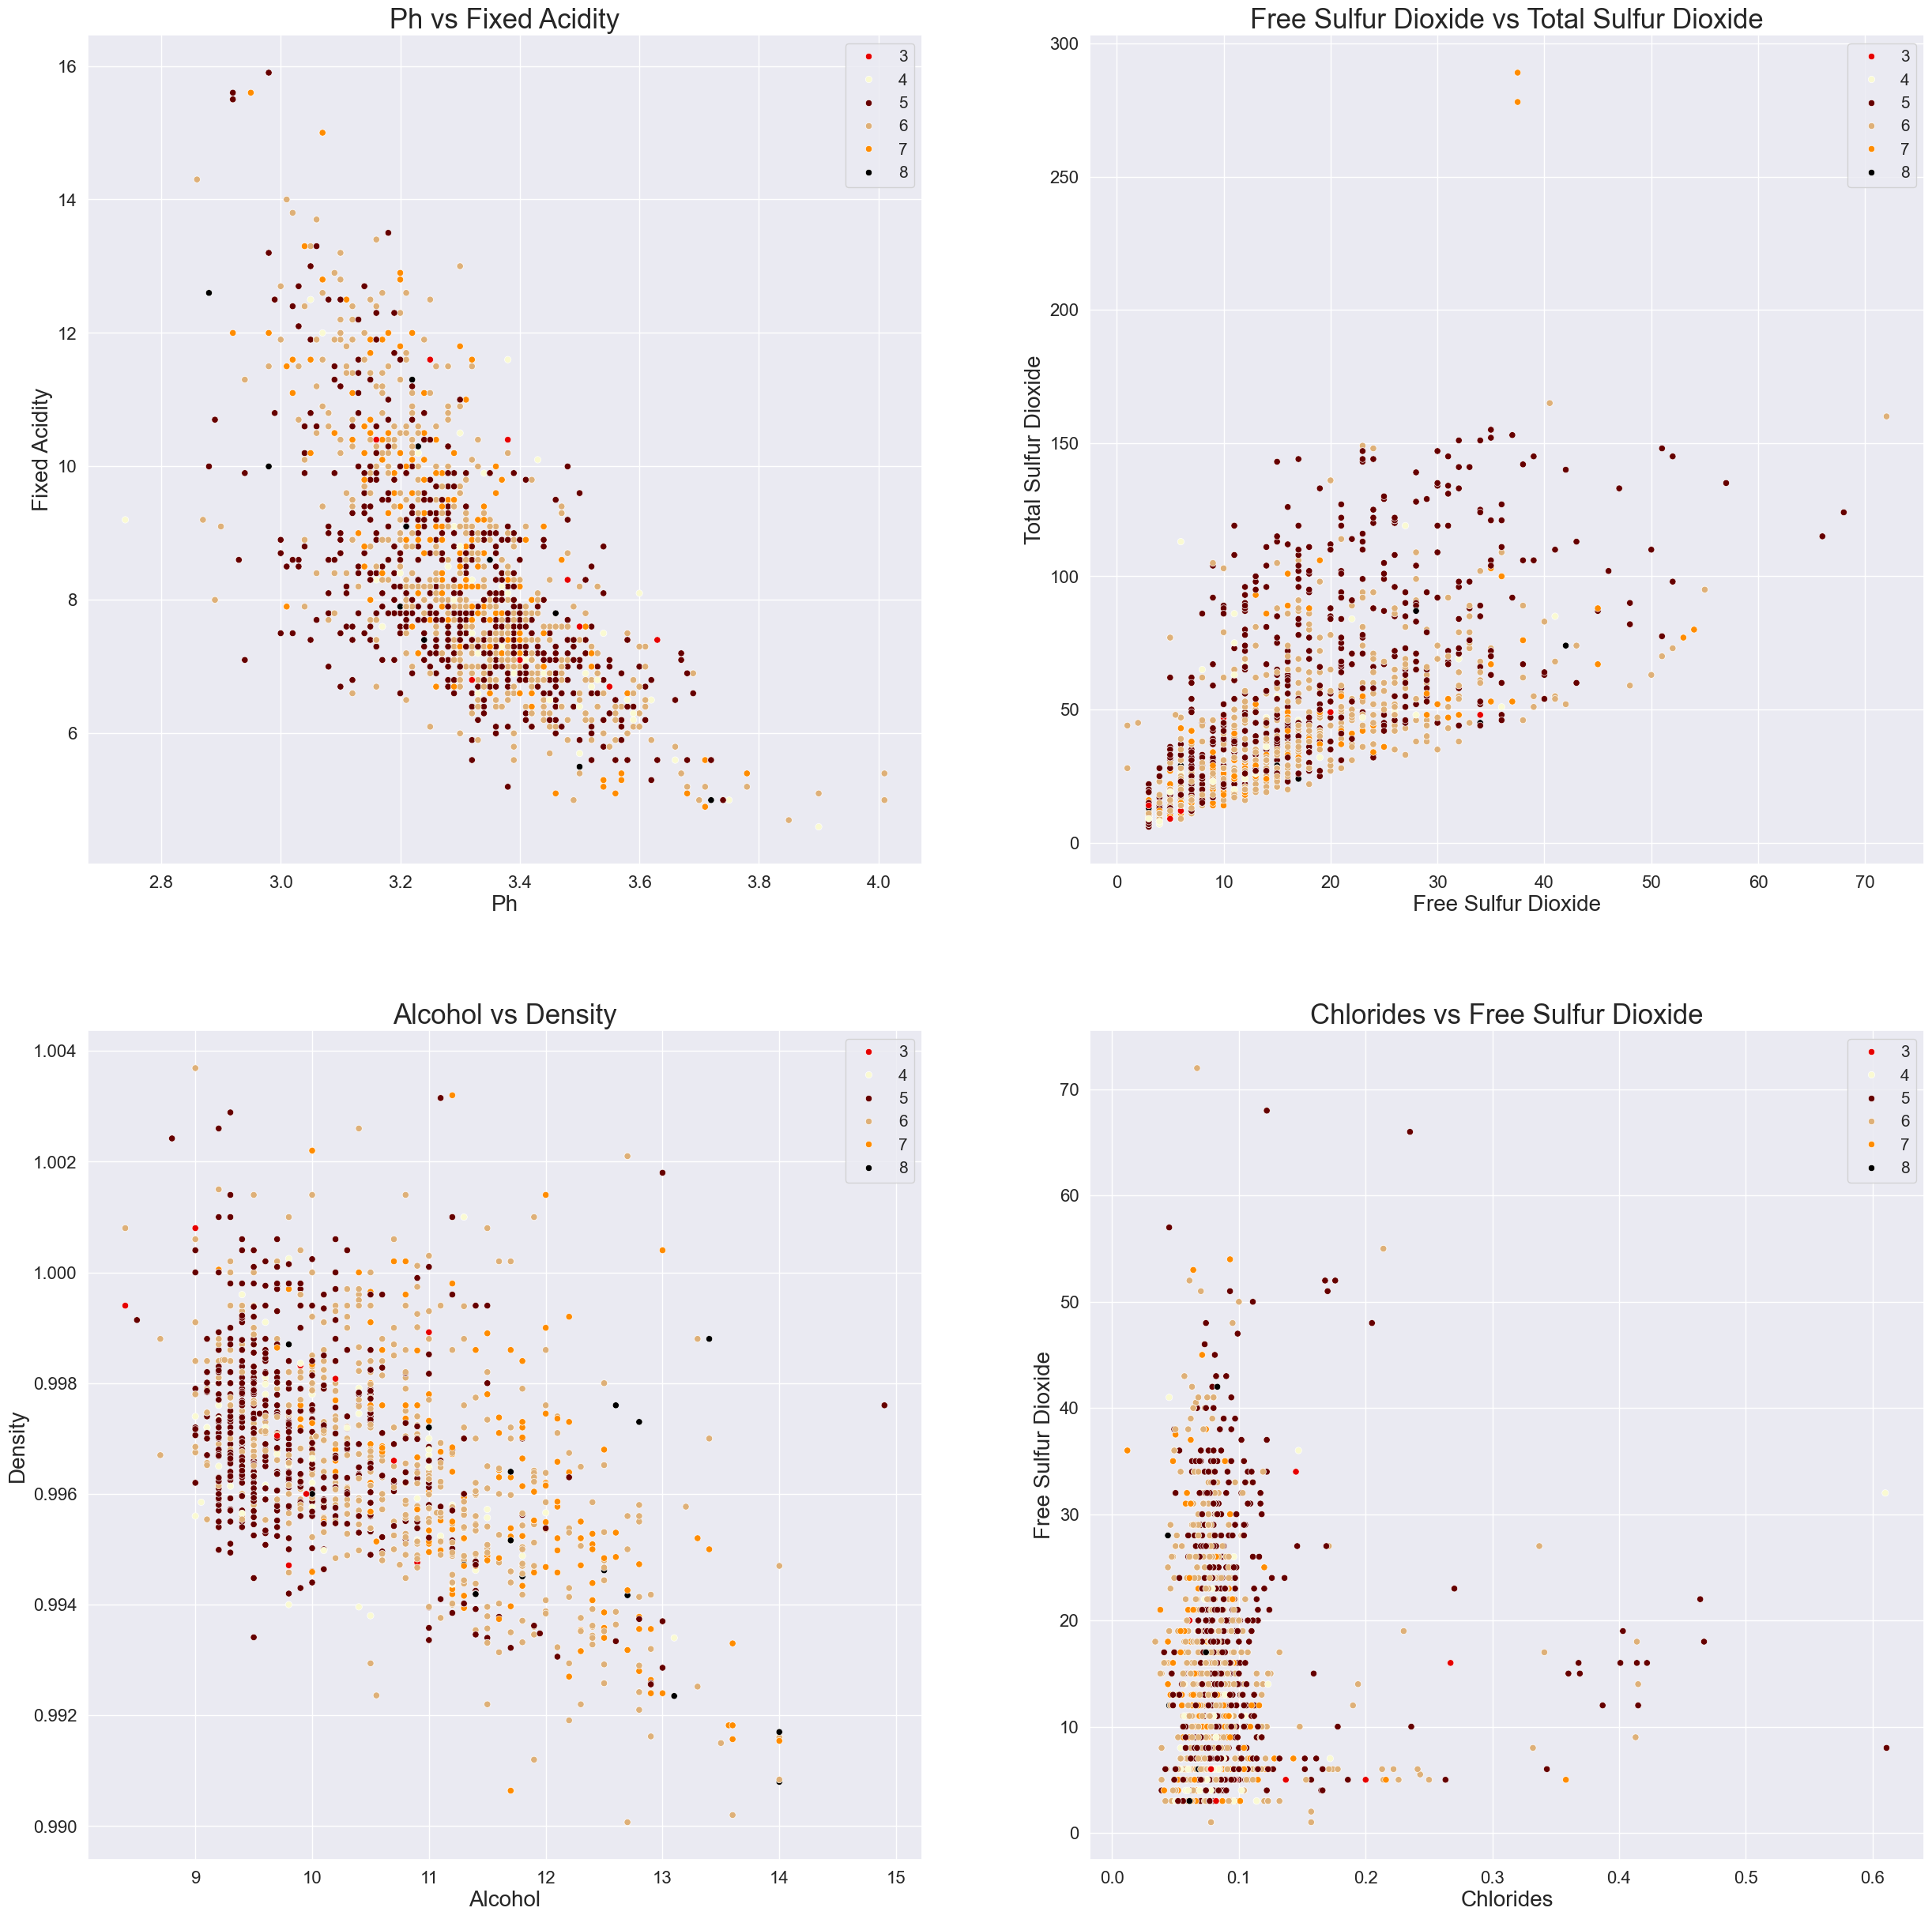

In [135]:
plt.figure(figsize = (30, 30))


def create_scatterplot(feature1, feature2):
    sns.scatterplot(data = df, x = feature1, y = feature2, hue = df['quality'], 
                    palette = ['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black'])
    plt.title(feature1.title() + ' vs ' + feature2.title(), fontsize = 25)
    plt.legend(fontsize = 15)
    plt.xlabel(feature1.title(), fontsize = 20)
    plt.ylabel(feature2.title(), fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    
plt.subplot(221)
create_scatterplot('pH', 'fixed acidity')

plt.subplot(222)
create_scatterplot('free sulfur dioxide', 'total sulfur dioxide')

plt.subplot(223)
create_scatterplot('alcohol', 'density')

plt.subplot(224)
create_scatterplot('chlorides', 'free sulfur dioxide')

plt.show()

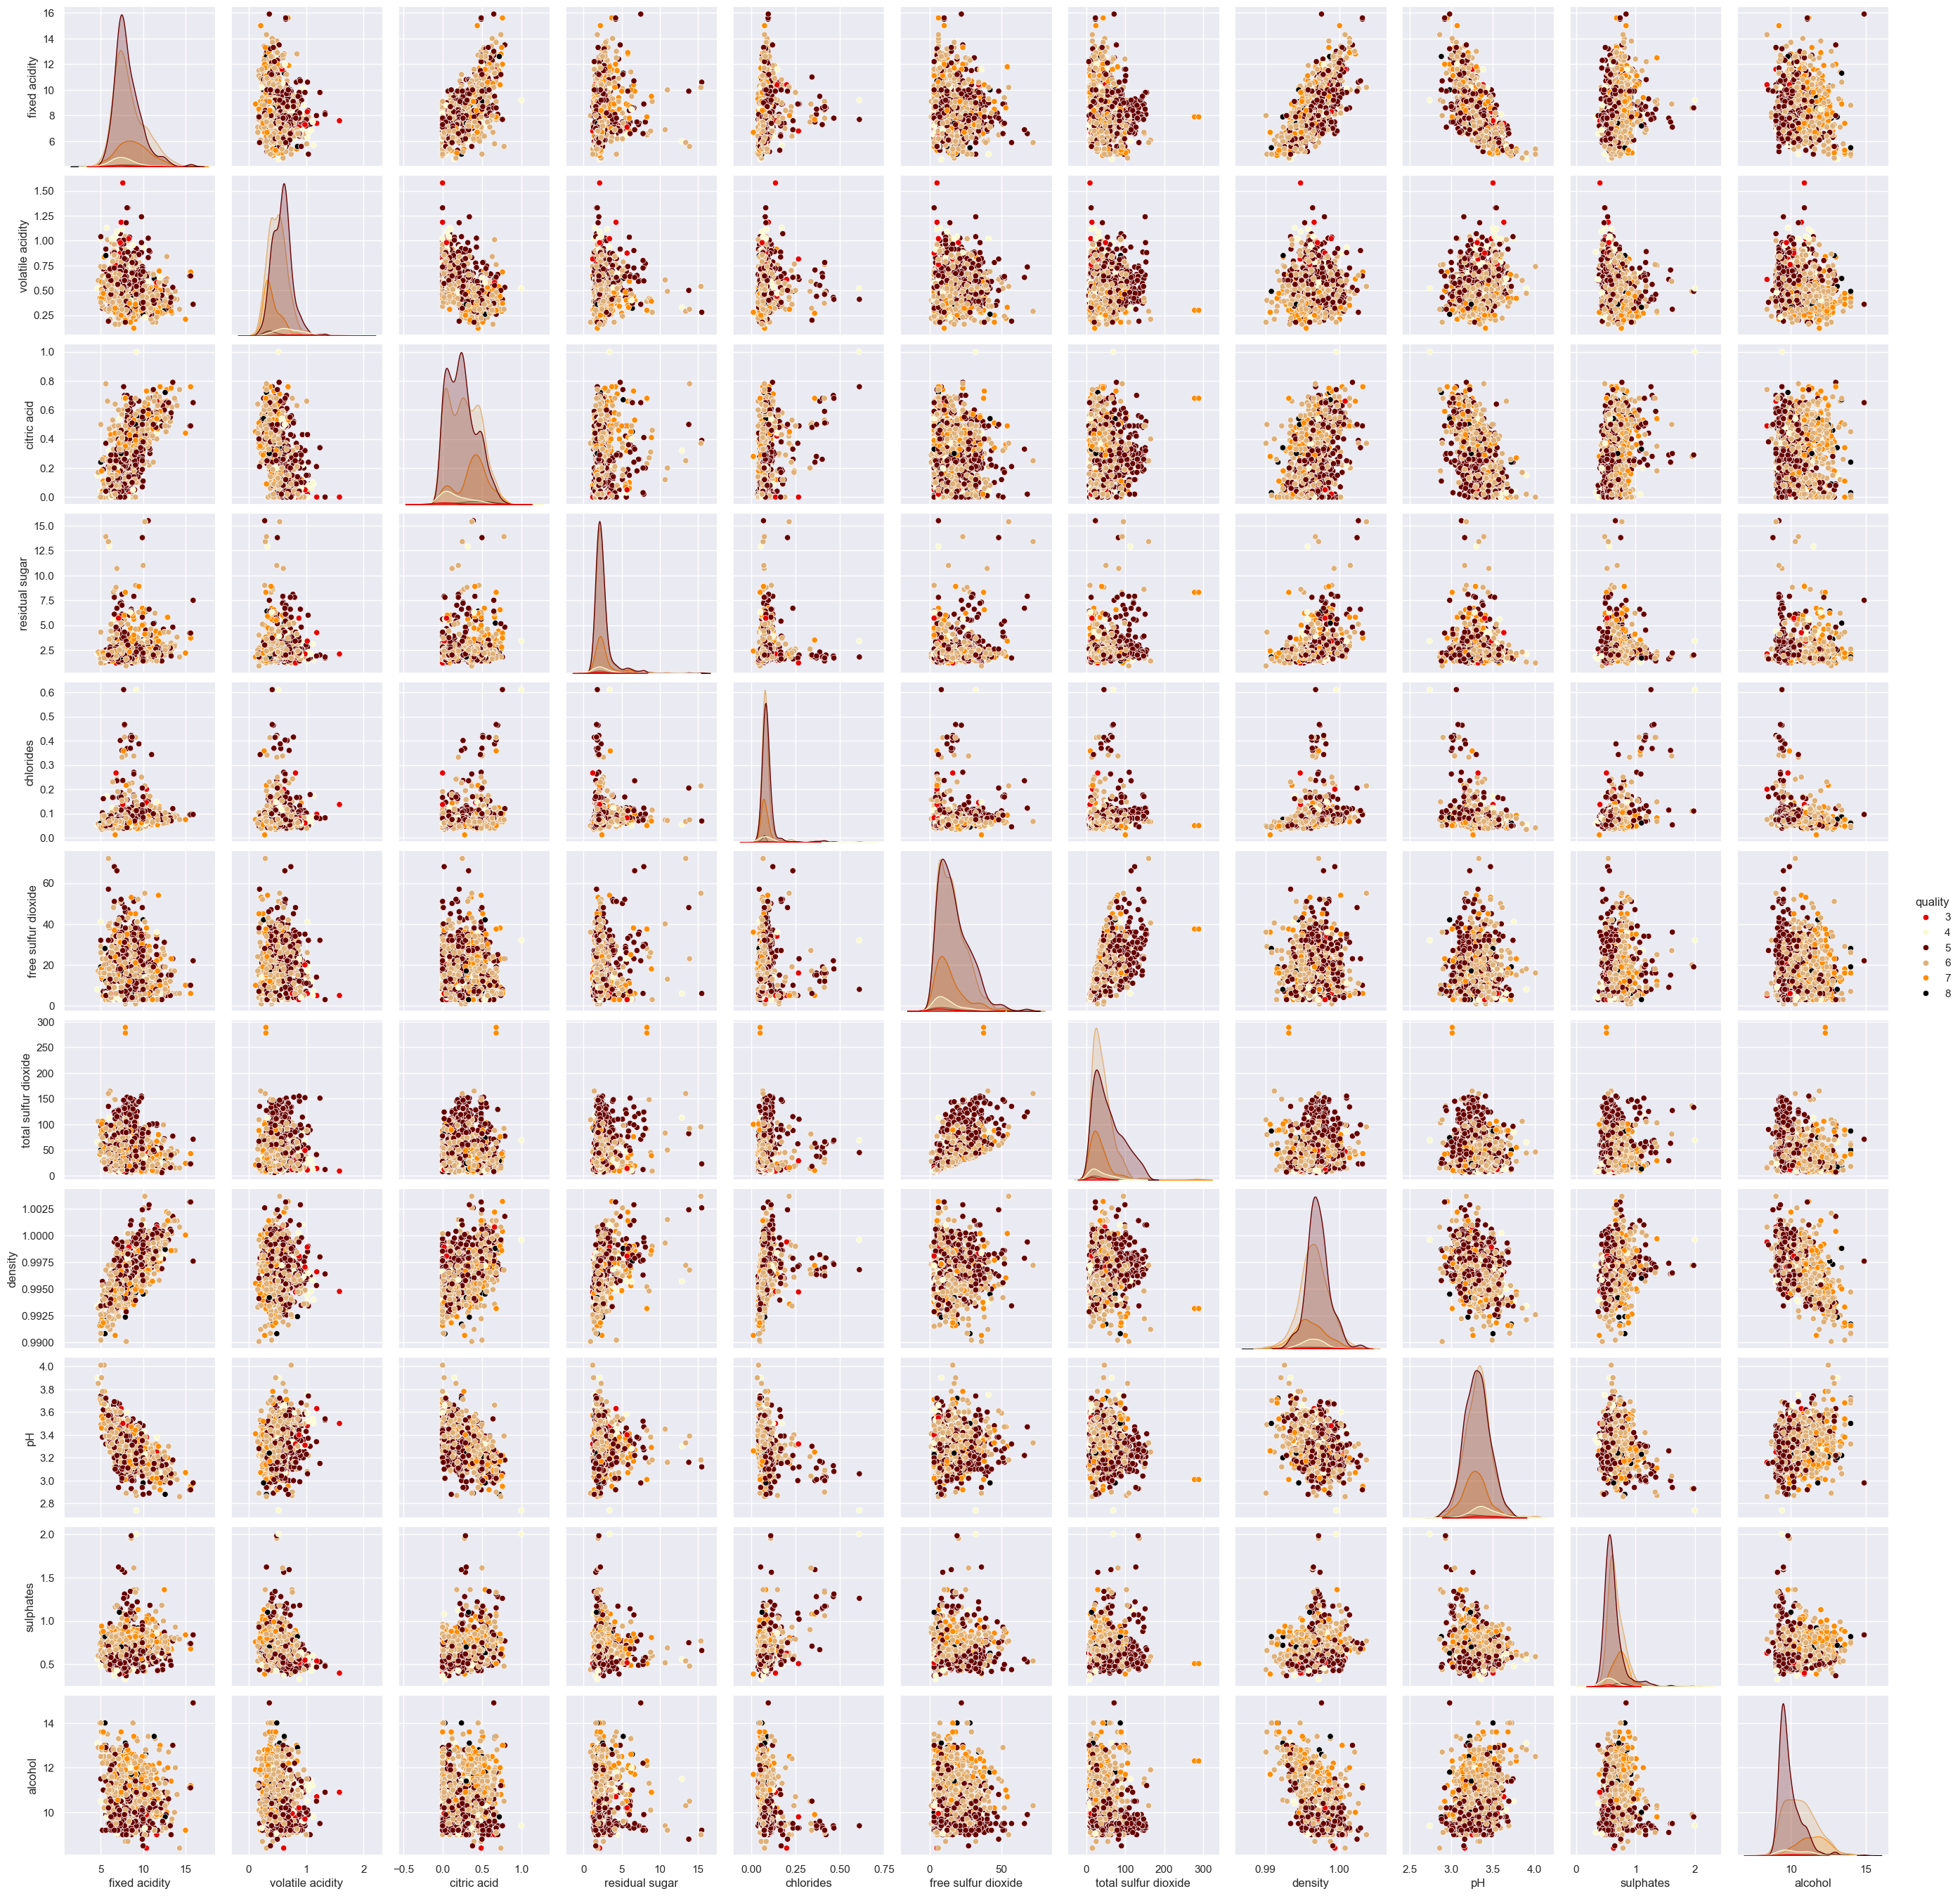

In [139]:
sns.pairplot(data = df, hue = 'quality', palette = ['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black'])
plt.show()

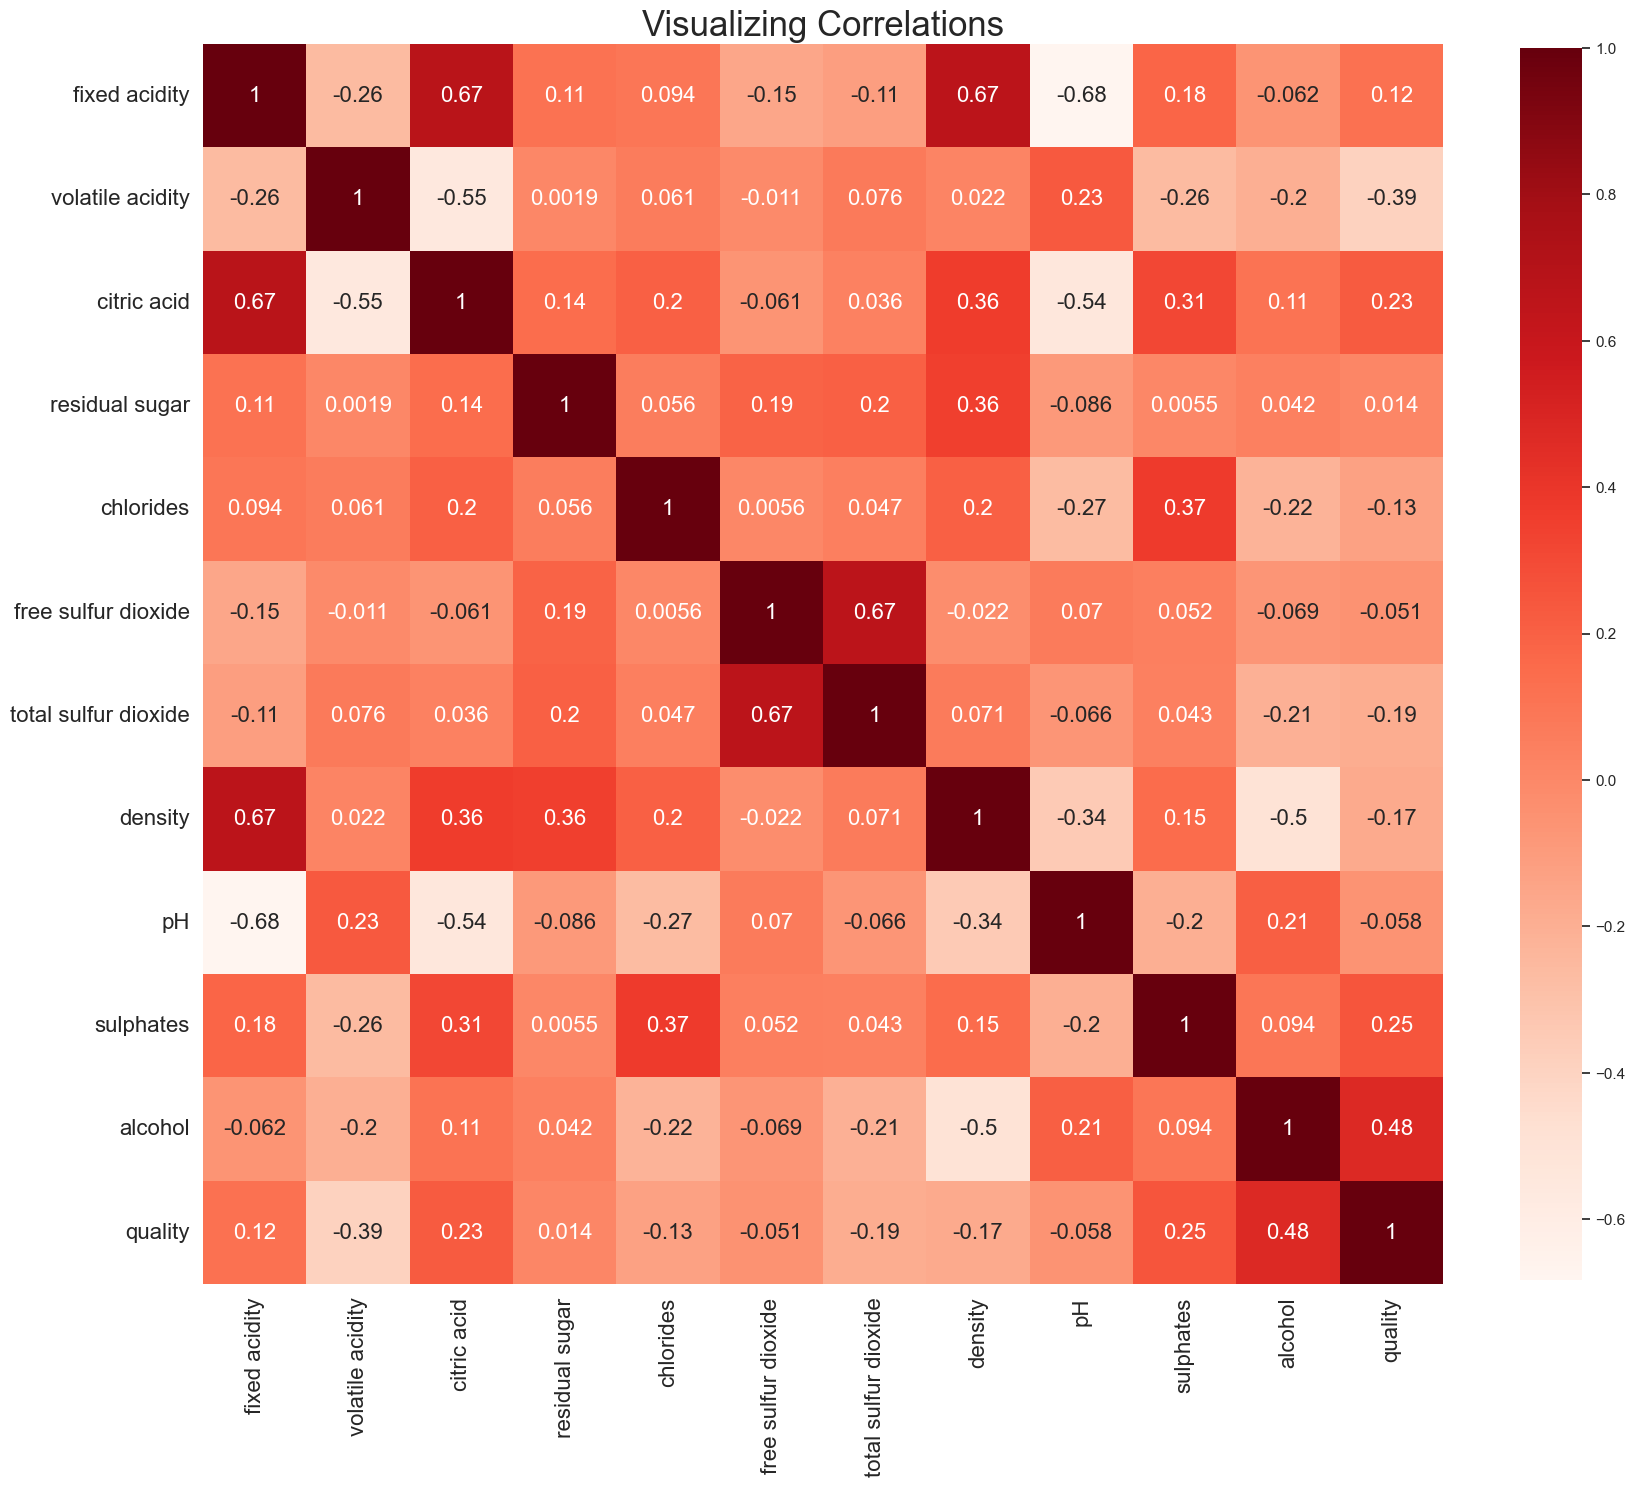

In [140]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), cmap = 'Reds', square = True, annot = True, annot_kws = {'size': 16},
           cbar_kws = {'shrink': 0.80})
plt.title("Visualizing Correlations", size = 25)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [147]:
df['quality'] = pd.cut(df['quality'], bins = [1, 5, 10], labels = ['bad', 'good'])

plt.figure(figsize = (15, 10))
ax = sns.countplot(df['quality'], palette = ['#e60000','#FAFAD2'])
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(df['quality'])) * 100), (p.get_x() + 0.3, p.get_height() + 13), 
                   color = 'black',
                   bbox = bbox_args,
                   fontsize = 15)

plt.title('Quality Count for Red Wine', fontsize = 25)
plt.xlabel('Quality', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

In [149]:
label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [151]:
scaler = StandardScaler()
features = [features for features in df.columns if df[features].dtype != int]
df[features] = scaler.fit_transform(df[features])
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol  quality  
0     -0.579207 -0.960246        0  
1      0.128950 -0.584777        0  
2     -0.048089 -0.584777        0  
3     -0.461180 -0.584777        1  
4     -0.579207 -0.960246        0  
...         ...       ...      ...  
1594  -0.461180  0.072294        0  
1595   0.601055  0.729364        1  
1596   0.542042  0.541630        1  
1597   0.305990 -0.209308        0  
1598   0.010924  0.541630        1  

[1599 rows x 12 columns]

In [153]:
X = df.drop('quality', axis = 1)
y = df['quality']
print(X, '\n\n\n', y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======For Logistic Regression======
Training Accuracy: 73.88584831899921%
Testing Accuracy: 76.875%
F1 Score: 0.783625730994152




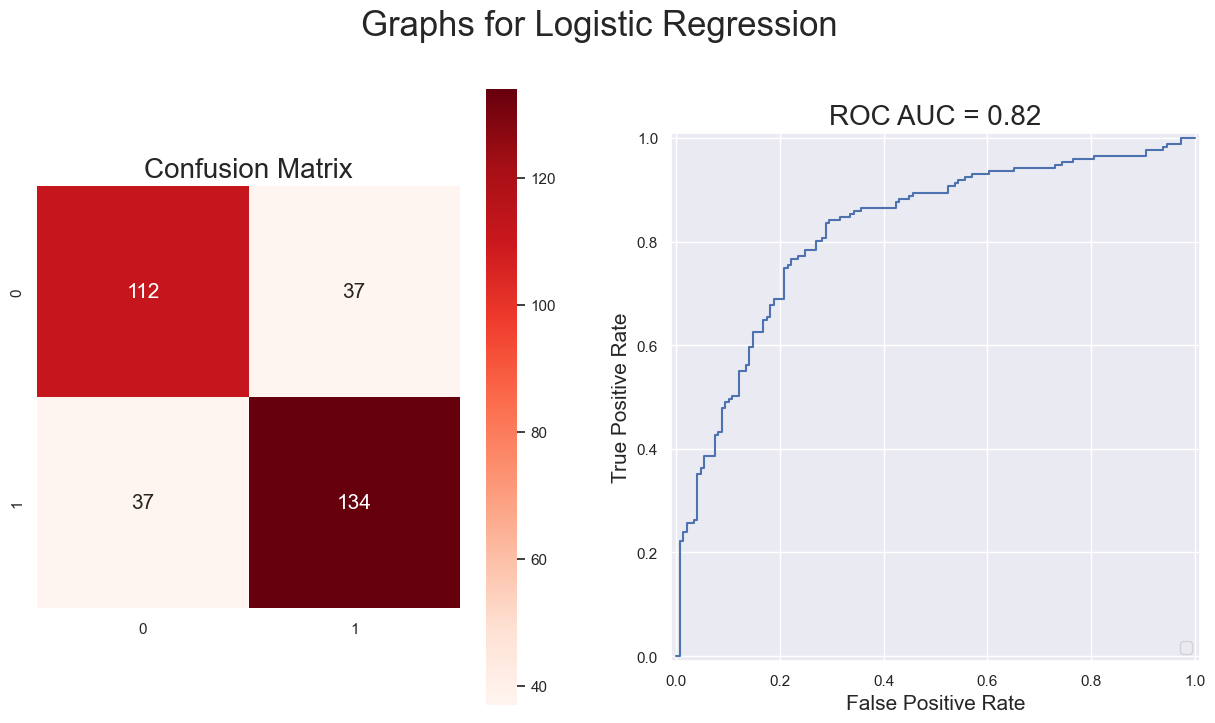

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======For K Nearest Neighbors======
Training Accuracy: 77.79515246286161%
Testing Accuracy: 75.9375%
F1 Score: 0.7806267806267806




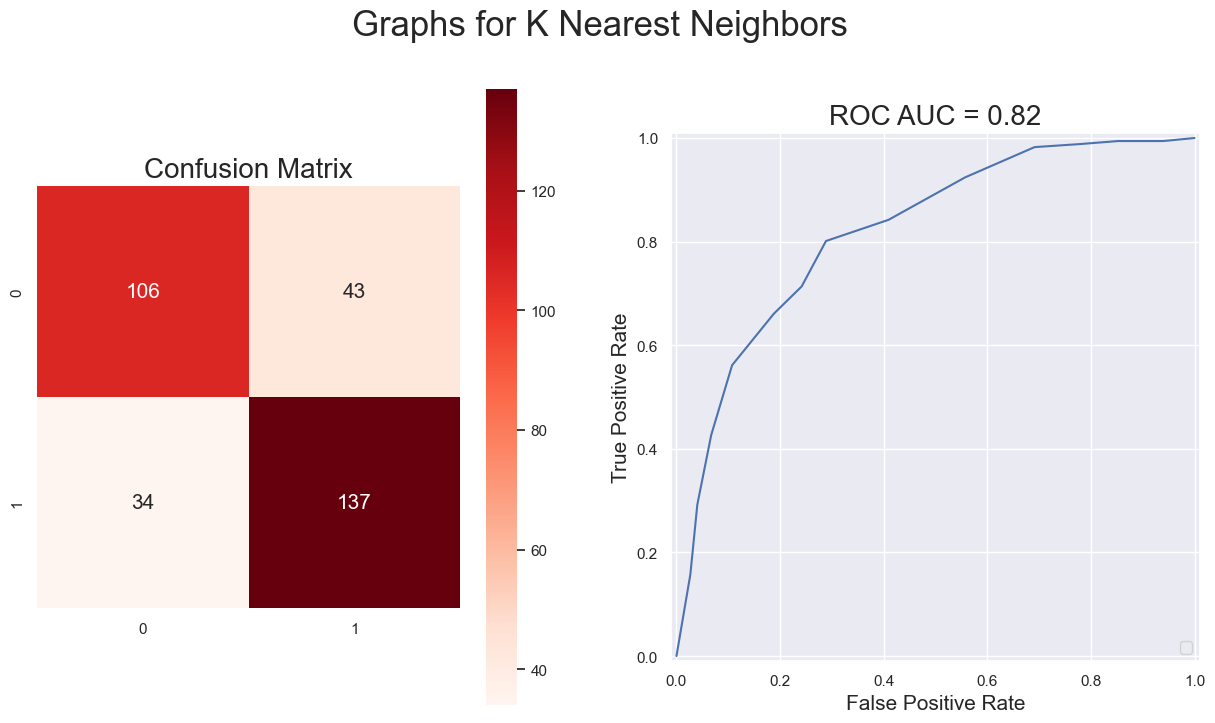

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======For Support Vector Classifier======
Training Accuracy: 78.65519937451134%
Testing Accuracy: 79.375%
F1 Score: 0.8047337278106509




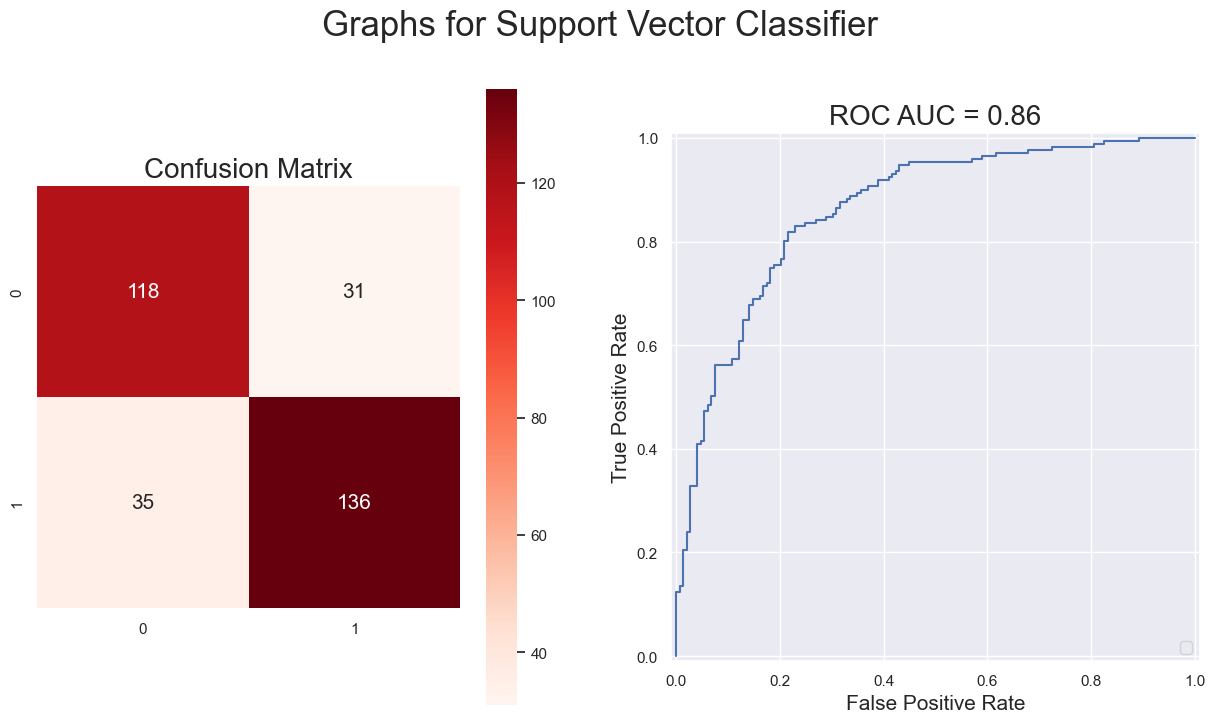

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======For Random Forest Classifer======
Training Accuracy: 100.0%
Testing Accuracy: 82.8125%
F1 Score: 0.8387096774193549




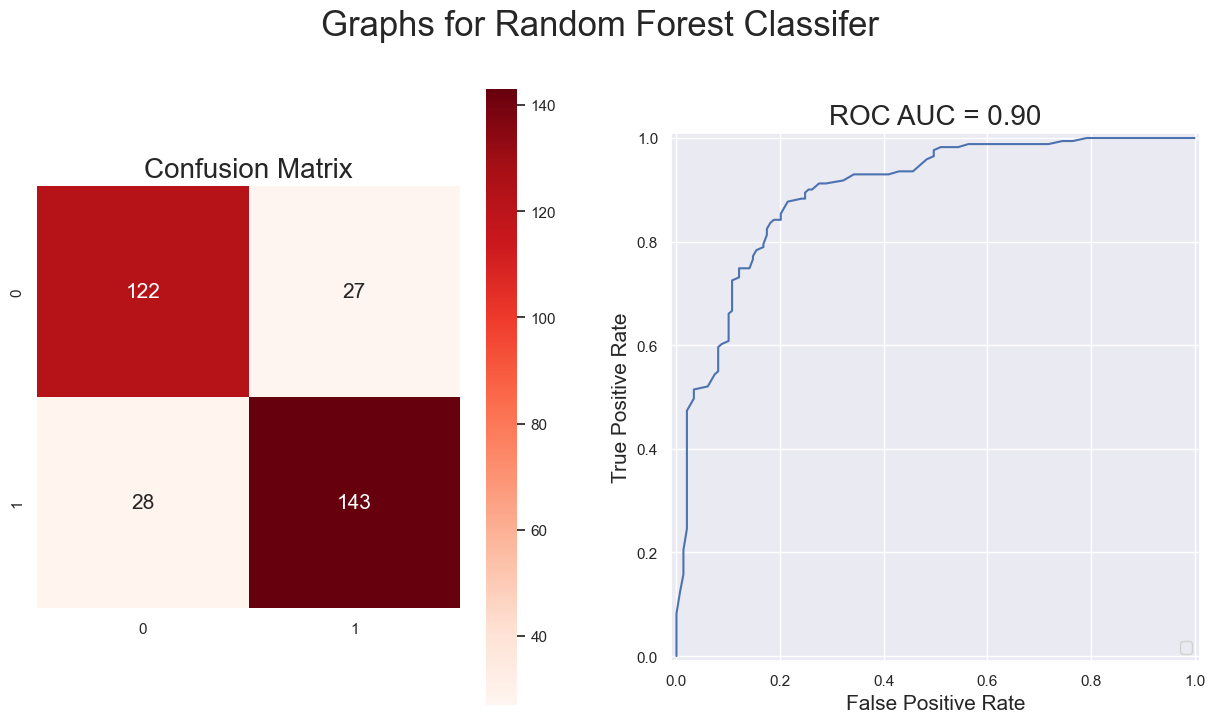

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======For Gradient Boosting Classifier======
Training Accuracy: 87.33385457388584%
Testing Accuracy: 77.1875%
F1 Score: 0.7859237536656891




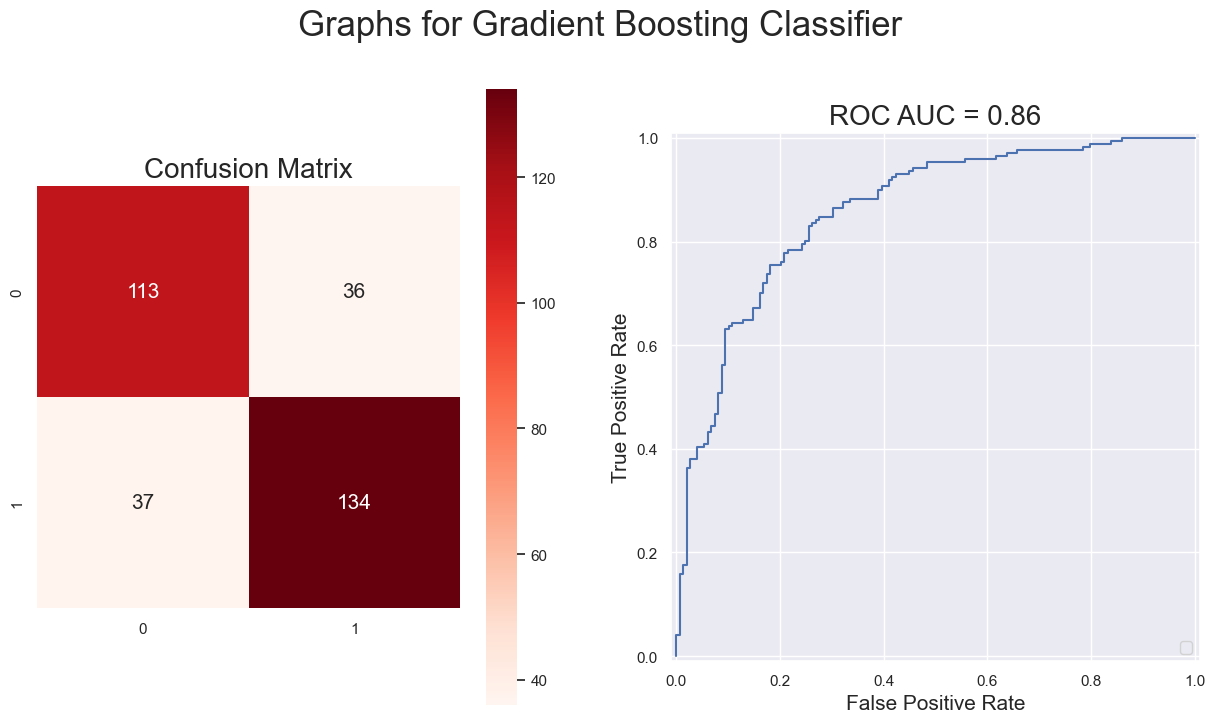

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======For Ada Boost Classifier======
Training Accuracy: 78.18608287724786%
Testing Accuracy: 72.8125%
F1 Score: 0.7549295774647887




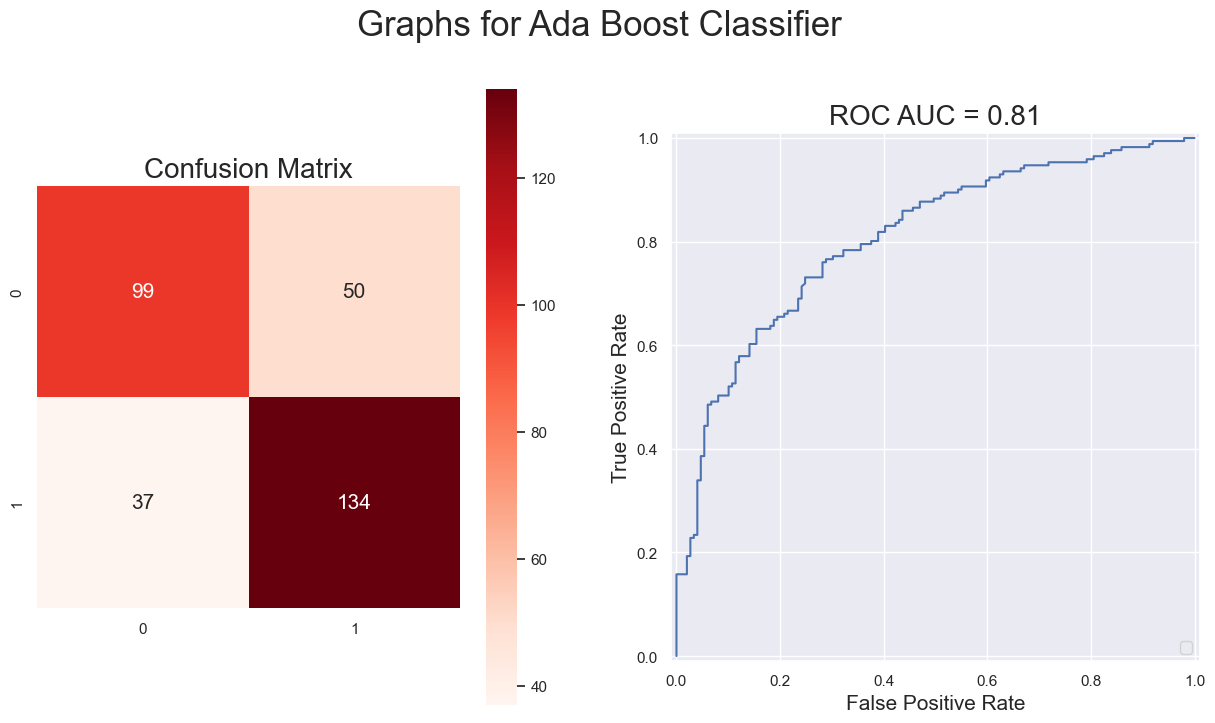

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======For Cat Boost Classifier======
Training Accuracy: 93.58874120406567%
Testing Accuracy: 80.625%
F1 Score: 0.8165680473372781




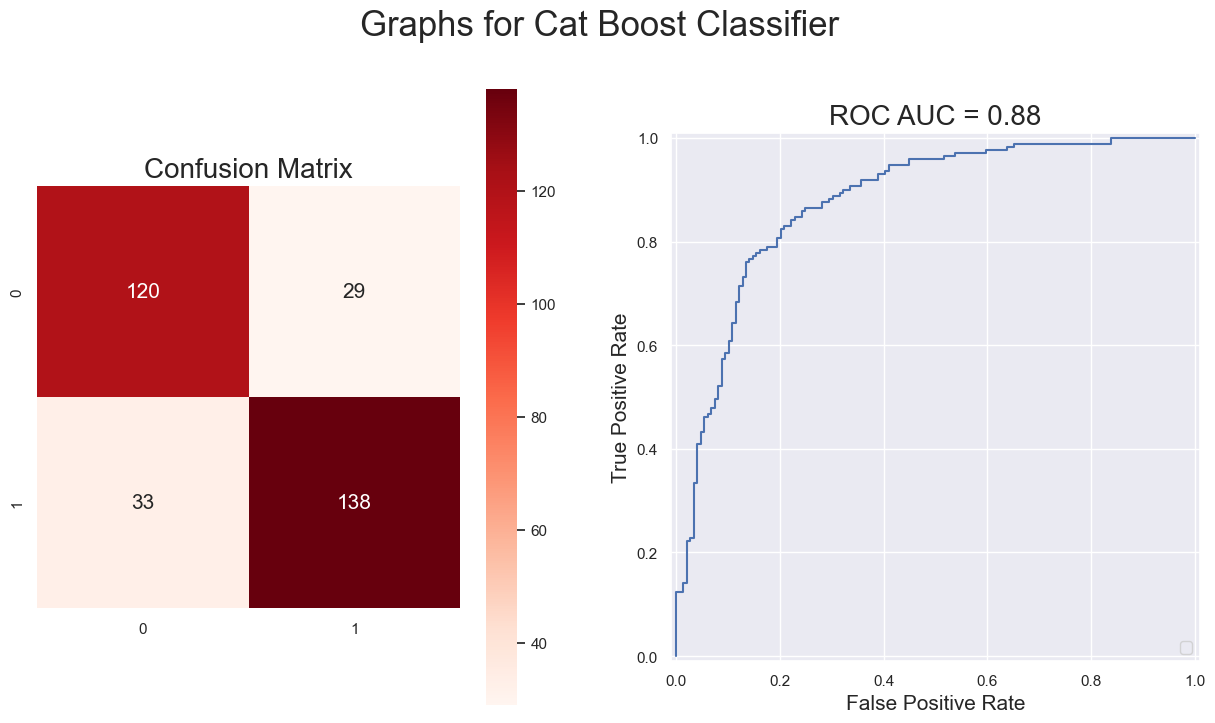

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


======For XGBoost Classifier======
Training Accuracy: 100.0%
Testing Accuracy: 81.875%
F1 Score: 0.8313953488372093




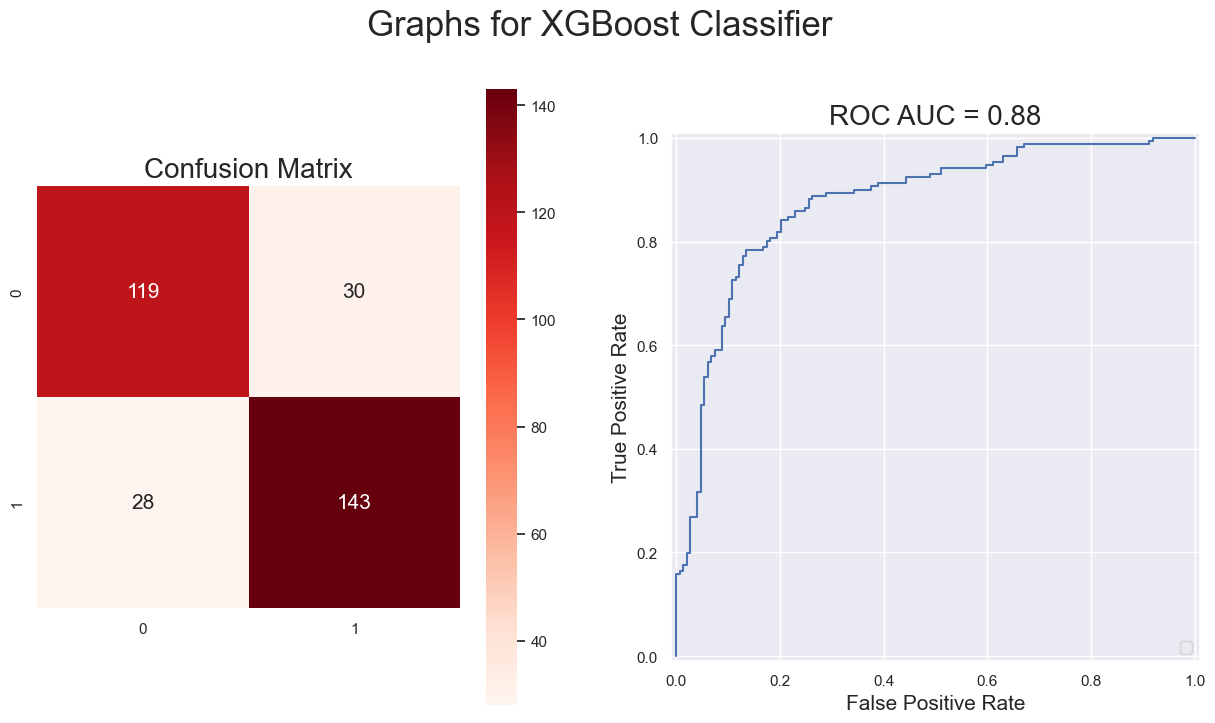

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 684, number of negative: 595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534793 -> initscore=0.139397
[LightGBM] [Info] Start training from score 0.139397
======For Light Gradient Boosting Machine======
Training Accuracy: 100.0%
Testing Accuracy: 81.875%
F1 Score: 0.8313953488372093




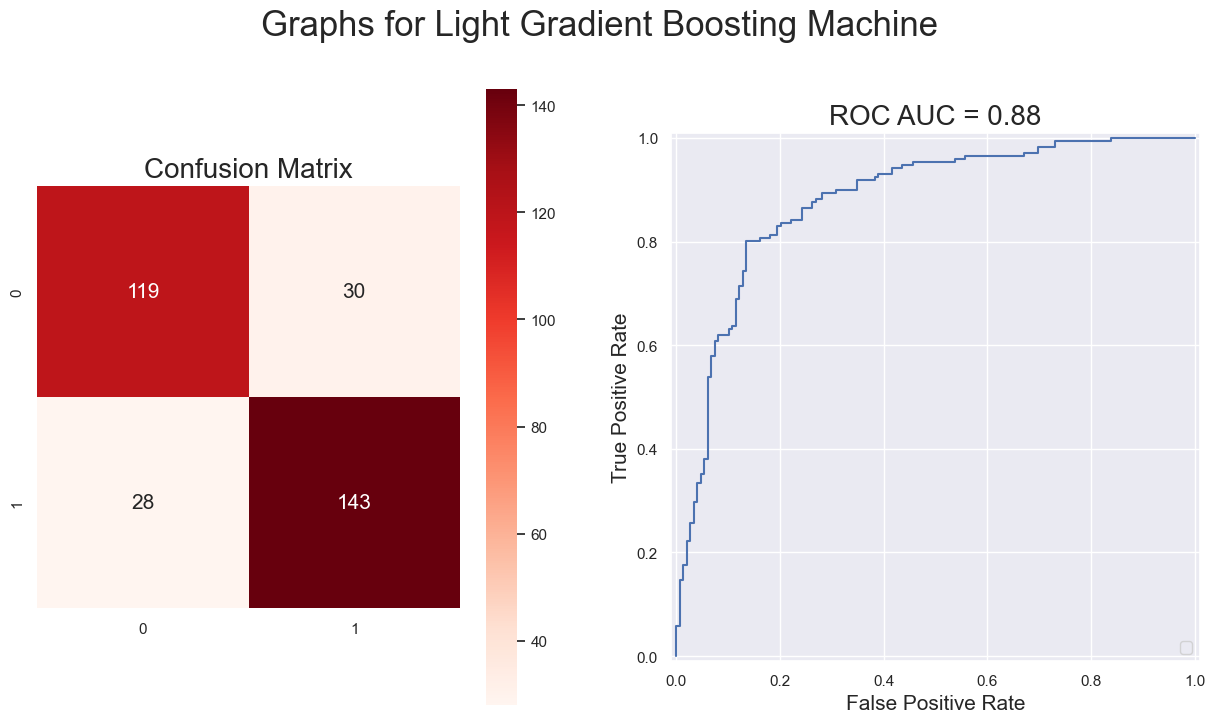

In [157]:
algo_name = []
accuracy = []

def display_results_and_graphs(algorithm_name, model): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    acc_model = model.score(X_test, y_test)
    
    algo_name.append(algorithm_name)
    accuracy.append(acc_model)
    
    print(f'======For {algorithm_name}======')
    print('Training Accuracy: {}%\nTesting Accuracy: {}%\nF1 Score: {}'.
          format((model.score(X_train, y_train) * 100), 
                 model.score(X_test, y_test) * 100, 
                 f1_score(y_test, y_pred)))
    print('\n')
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))
    
    fig.suptitle('Graphs for ' + algorithm_name, fontsize = 25)
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, 
                cmap = 'Reds', annot_kws = {'size': 15}, 
                square = True, fmt = '.0f',
                ax = axes[0])
    axes[0].set_title('Confusion Matrix', fontsize = 20)
    
    fpr = {}
    tpr = {}
    roc_auc = {}
    n_classes = len(df['quality'].value_counts())   
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
    roc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr).plot(ax = axes[1])
    axes[1].set_title(f'ROC AUC = {roc:.2f}', fontsize = 20)
    axes[1].set_xlabel('False Positive Rate', fontsize = 15)
    axes[1].set_ylabel('True Positive Rate', fontsize = 15)
    
    plt.show()
    
    
display_results_and_graphs('Logistic Regression', LogisticRegression())
display_results_and_graphs('K Nearest Neighbors', KNeighborsClassifier(n_neighbors = 13))
display_results_and_graphs('Support Vector Classifier', SVC(probability=True))
display_results_and_graphs('Random Forest Classifer', RandomForestClassifier(random_state = 0))
display_results_and_graphs('Gradient Boosting Classifier', GradientBoostingClassifier(random_state = 0))
display_results_and_graphs('Ada Boost Classifier', AdaBoostClassifier(random_state = 0))
display_results_and_graphs('Cat Boost Classifier', CatBoostClassifier(verbose = 0))
display_results_and_graphs('XGBoost Classifier', XGBClassifier())
display_results_and_graphs('Light Gradient Boosting Machine', lgbm.LGBMClassifier())

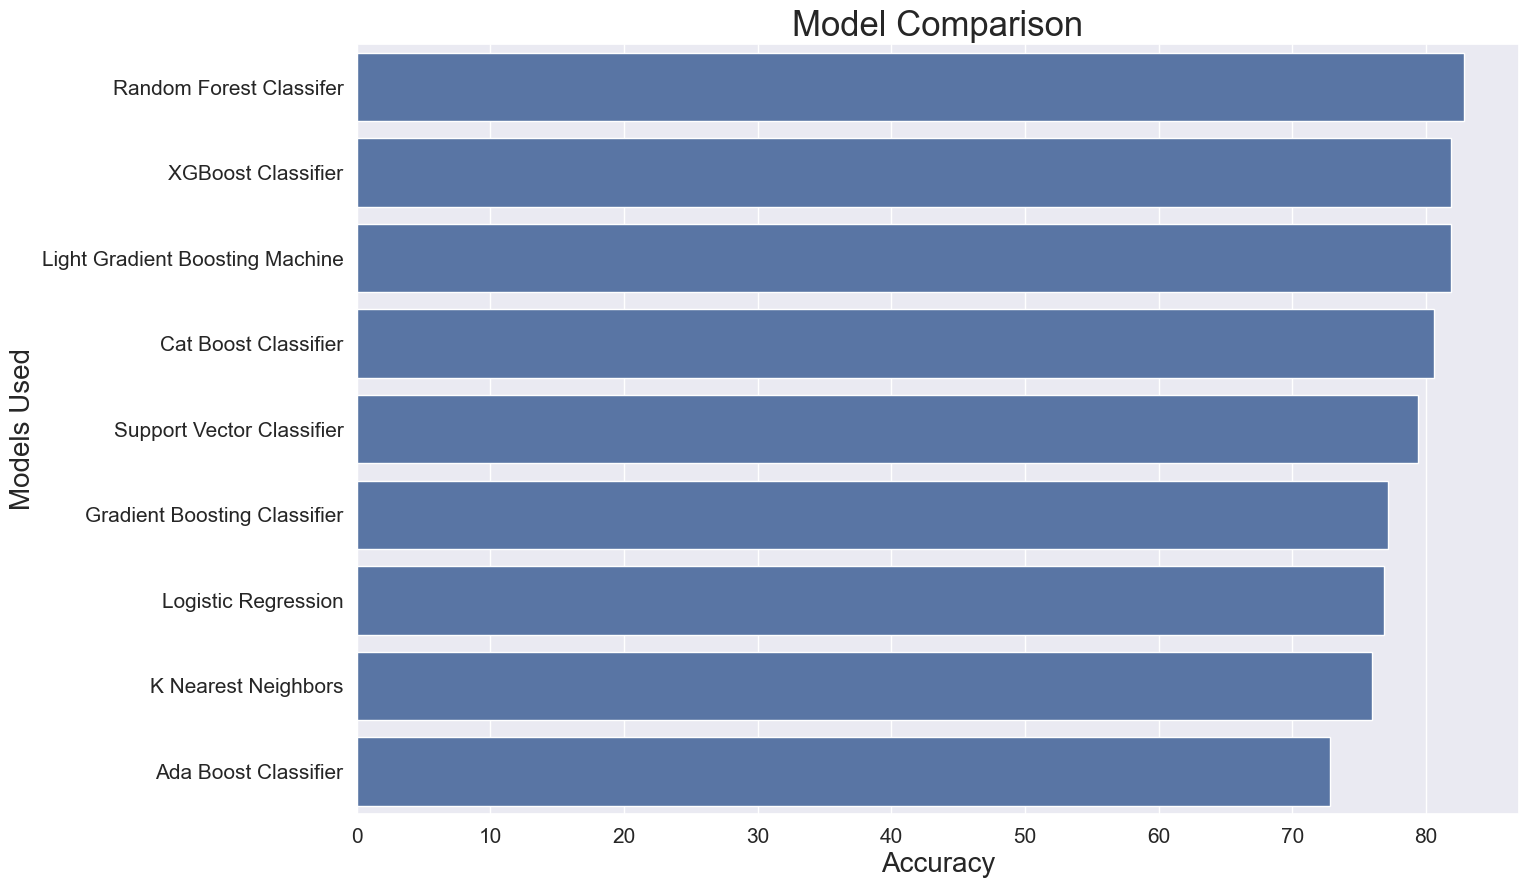

In [159]:
model_comparison = {}

for k, v in zip(algo_name, accuracy):
    model_comparison.update({k: v * 100})

model_comparison = dict(sorted(model_comparison.items(), key = lambda x: x[1], reverse = True))
models = list(model_comparison.keys())
accuracy = list(model_comparison.values())

plt.figure(figsize = (15, 10))
sns.barplot(x = accuracy, y = models)
plt.title('Model Comparison', fontsize = 25)
plt.xlabel('Accuracy', fontsize = 20)
plt.ylabel('Models Used', fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [163]:
def objective(trial):
    param_grid = {
        'tree_method': 'gpu_hist', 
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, 50),
        'max_depth': trial.suggest_categorical('max_depth', [5, 7, 9, 11, 13, 15, 17]),
        'random_state': 0,
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    
    model = XGBClassifier(**param_grid)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_model = model.score(X_test, y_test)
    
    return acc_model

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 300)

[I 2024-09-03 23:21:50,794] A new study created in memory with name: no-name-aa0bffb4-de14-45bc-967f-4cce36bba735
[W 2024-09-03 23:21:50,802] Trial 0 failed with parameters: {'lambda': 2.341028395209735, 'alpha': 7.437001918841561, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.01, 'n_estimators': 850, 'max_depth': 15, 'min_child_weight': 146} because of the following error: XGBoostError('[23:21:50] C:\\buildkite-agent\\builds\\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\\xgboost\\xgboost-ci-windows\\src\\tree\\updater_gpu_hist.cu:861: Exception in gpu_hist: [23:21:50] C:\\buildkite-agent\\builds\\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\\xgboost\\xgboost-ci-windows\\src\\tree\\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device\n').
Traceback (most recent call last):
  File "C:\Users\ashis\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_

XGBoostError: [23:21:50] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:861: Exception in gpu_hist: [23:21:50] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device


In [106]:
#SVC implementation and hyperparameter tuning_wine dataset

In [108]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

In [112]:
data=pd.read_csv("data/winequality-red.csv")

In [116]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [120]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [122]:
data.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

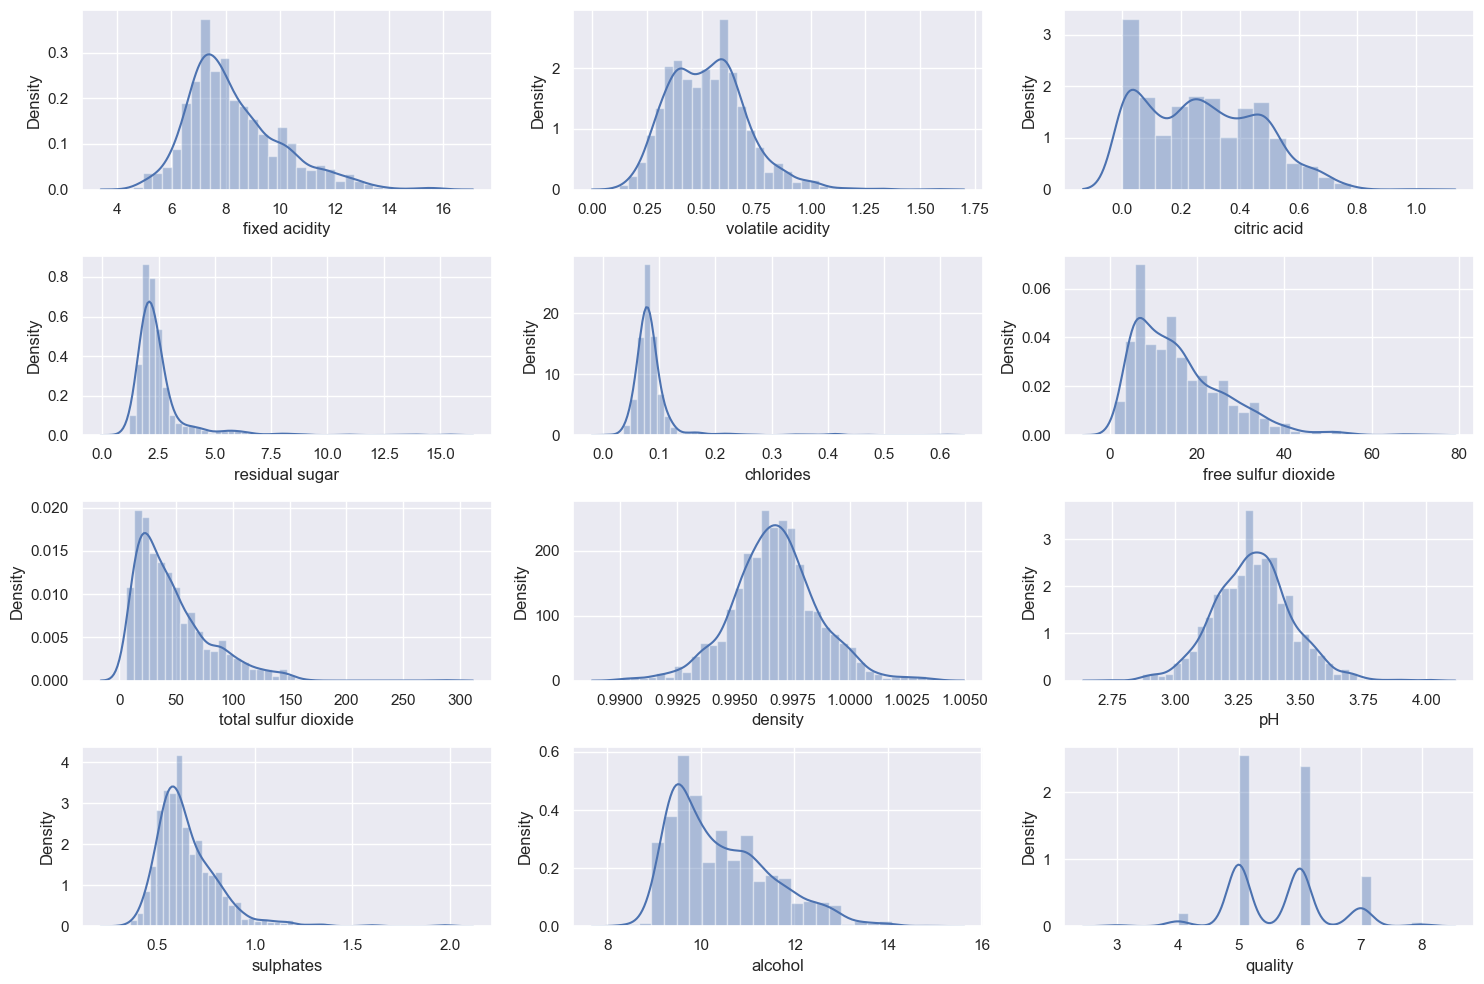

In [124]:
sns.set(rc={'figure.figsize':(15,10)})
pn=1
for features in data:
    plt.subplot(4,3,pn)
    sns.distplot(data[features],kde=True,color='b')
    pn+=1
    plt.xlabel(features)
    plt.tight_layout()

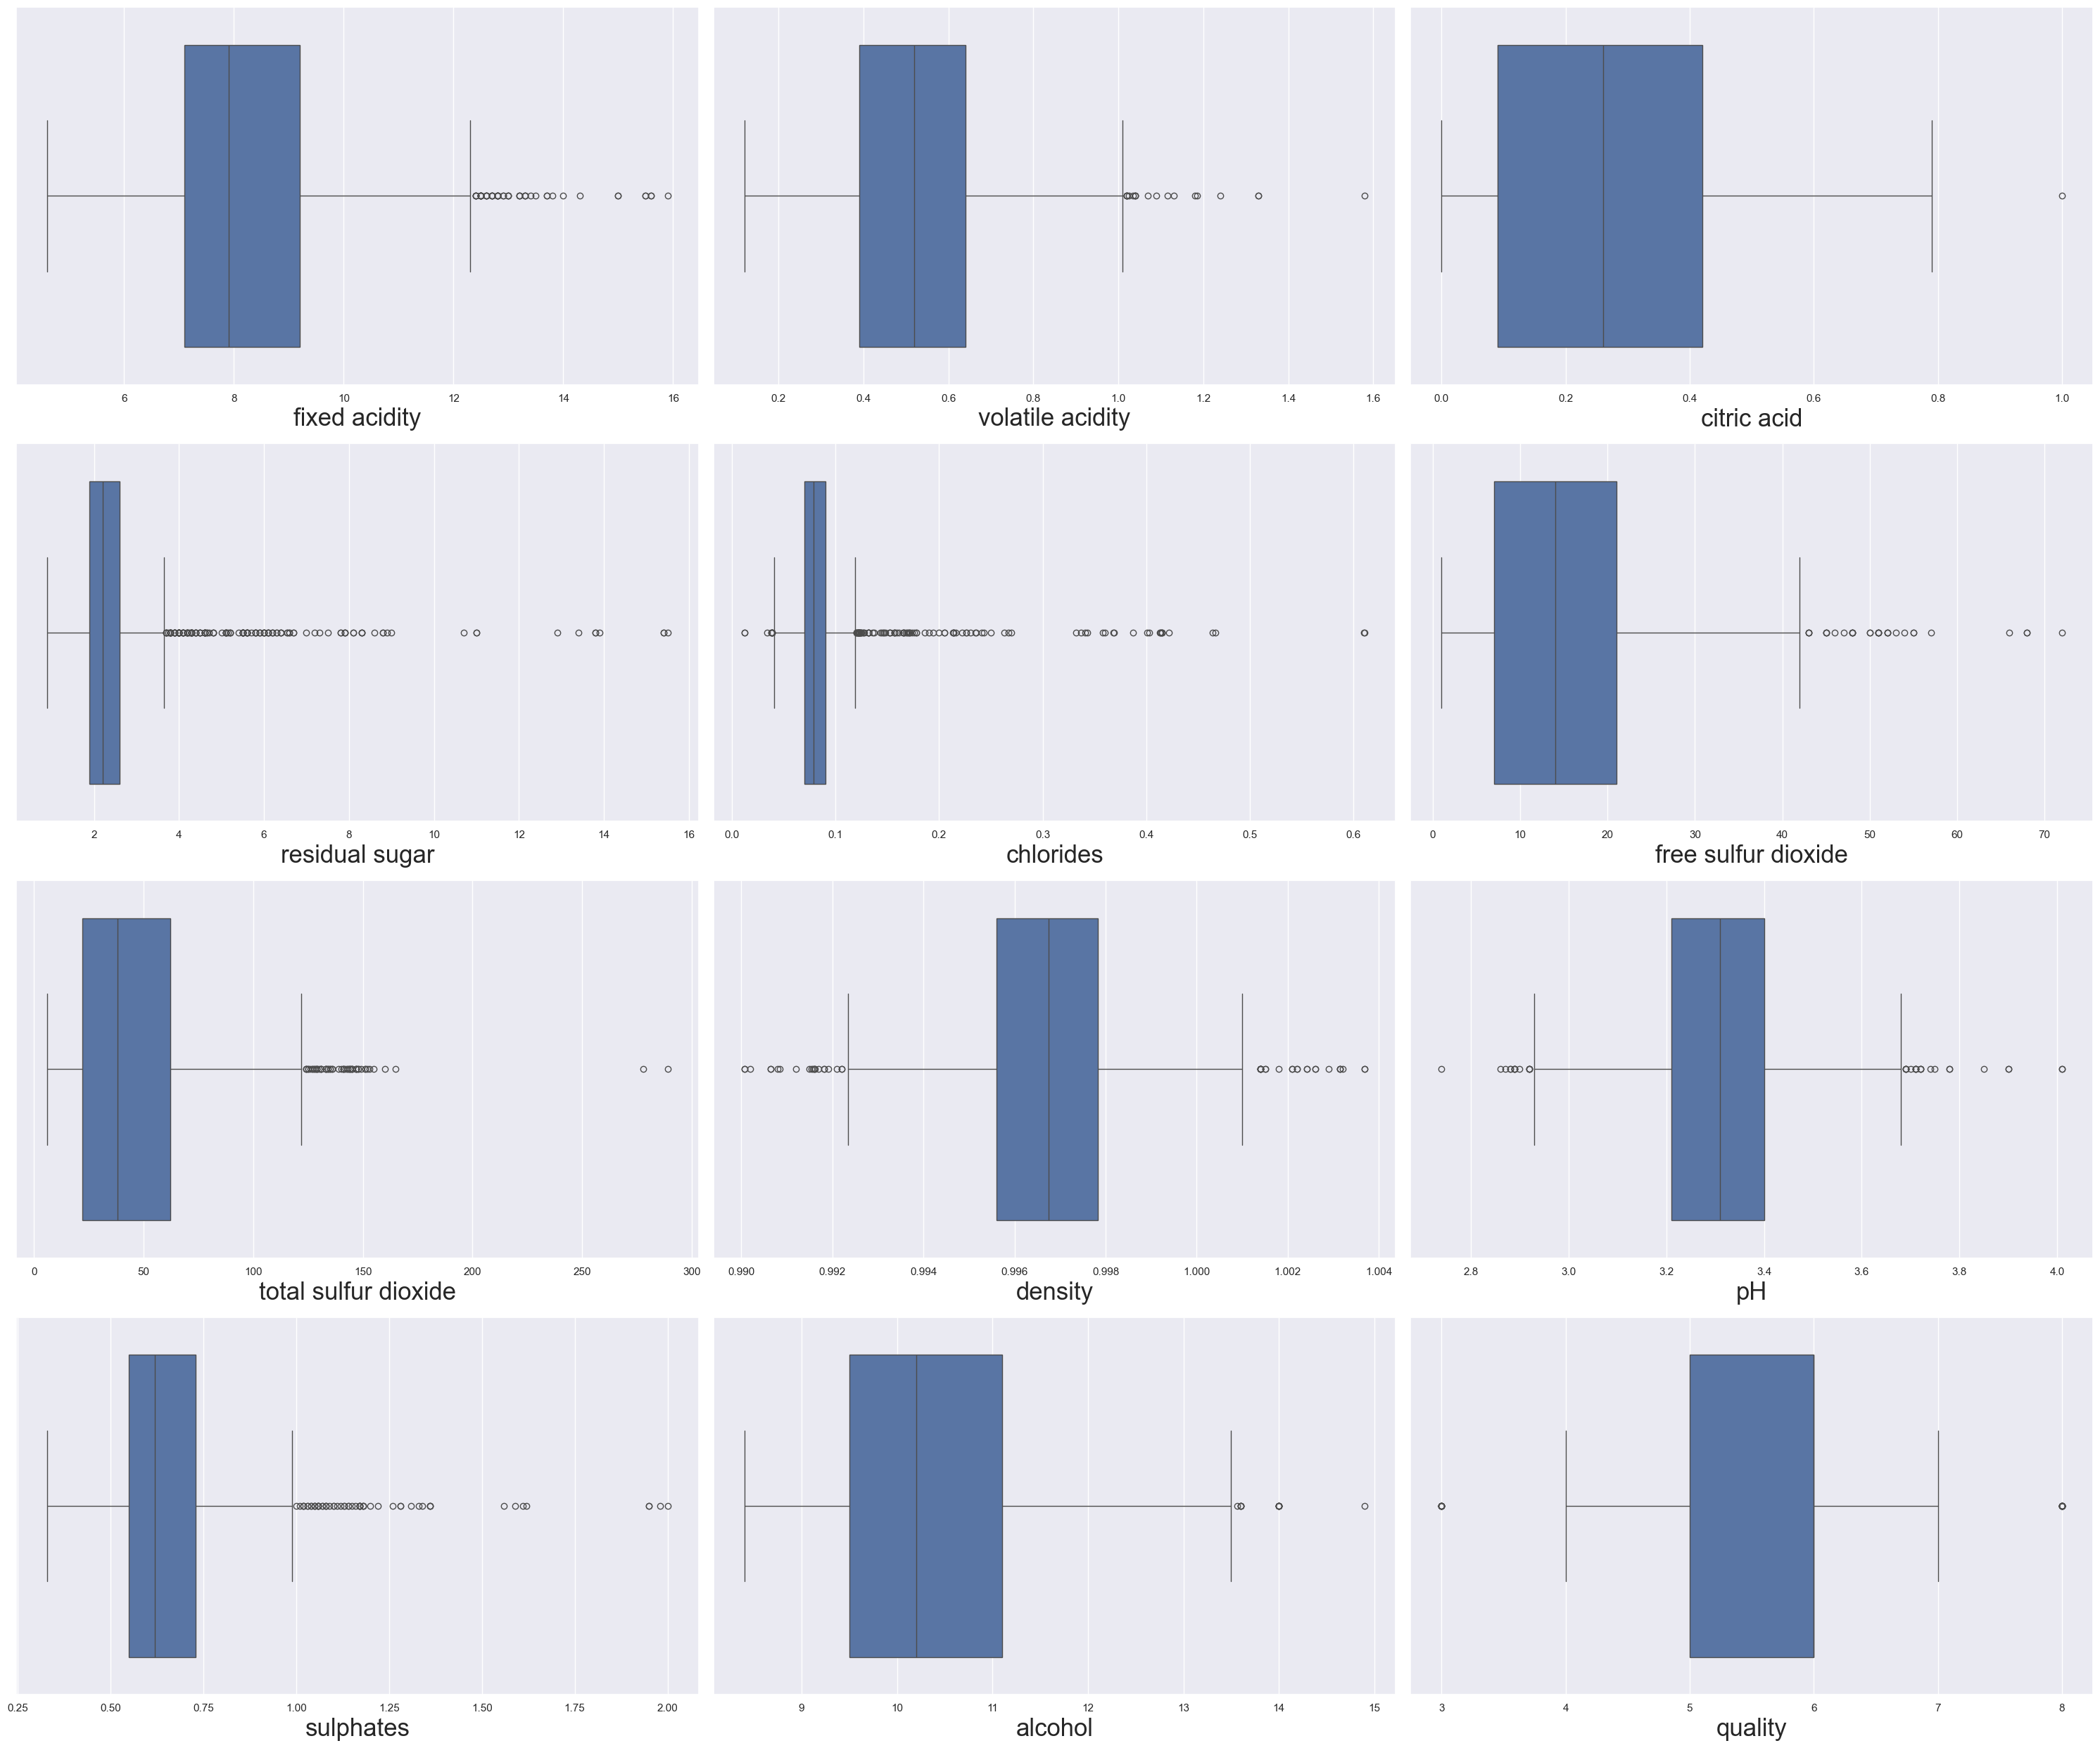

In [126]:
sns.set(rc={'figure.figsize':(30,25)})
pn=1
for features in data:
    plt.subplot(4,3,pn)
    sns.boxplot(x=features,data=data,color='b')
    pn+=1
    plt.xlabel(features,fontsize=25)
    plt.tight_layout()

In [128]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [130]:
outlier_handling('fixed acidity')

'outliers removed'

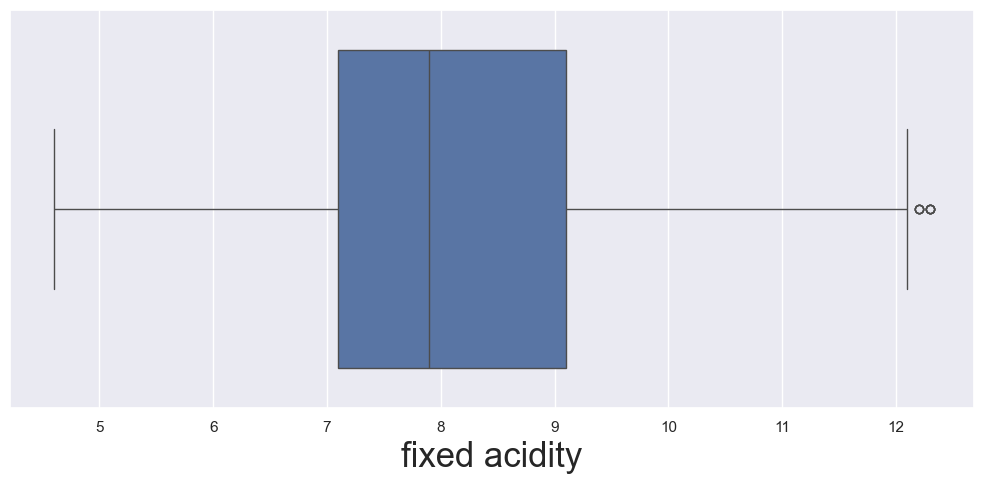

In [132]:
plt.figure(figsize=(10,5))
sns.boxplot(x='fixed acidity',data=data,color='b')
plt.xlabel('fixed acidity',fontsize=25)
plt.tight_layout()

In [134]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [136]:
outlier_handling('volatile acidity')

'outliers removed'

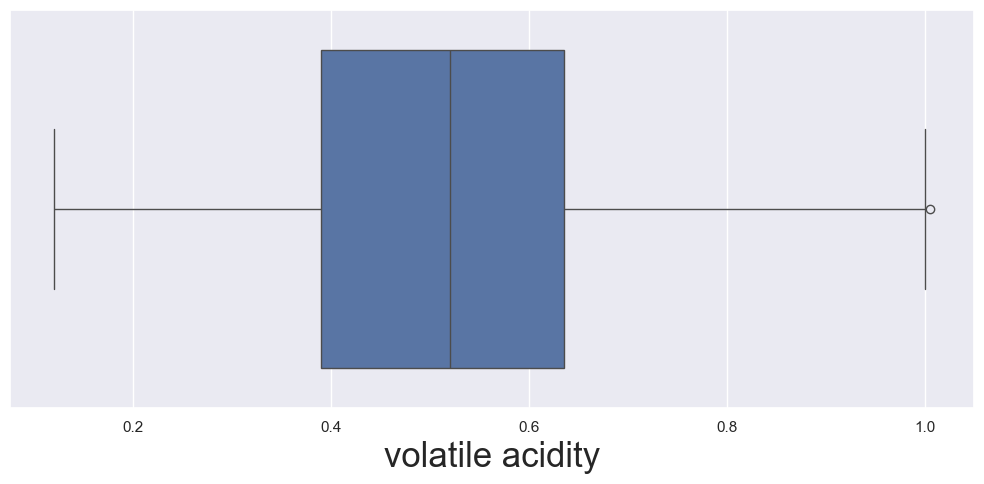

In [138]:
plt.figure(figsize=(10,5))
sns.boxplot(x='volatile acidity',data=data,color='b')
plt.xlabel('volatile acidity',fontsize=25)
plt.tight_layout()

In [140]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [142]:
outlier_handling('residual sugar')

'outliers removed'

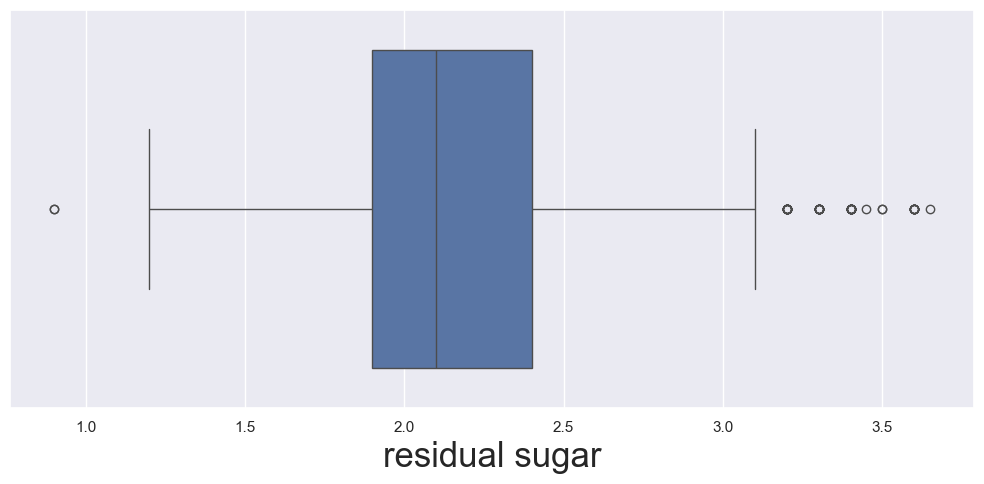

In [144]:
plt.figure(figsize=(10,5))
sns.boxplot(x='residual sugar',data=data,color='b')
plt.xlabel('residual sugar',fontsize=25)
plt.tight_layout()

In [146]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [148]:
outlier_handling('chlorides')

'outliers removed'

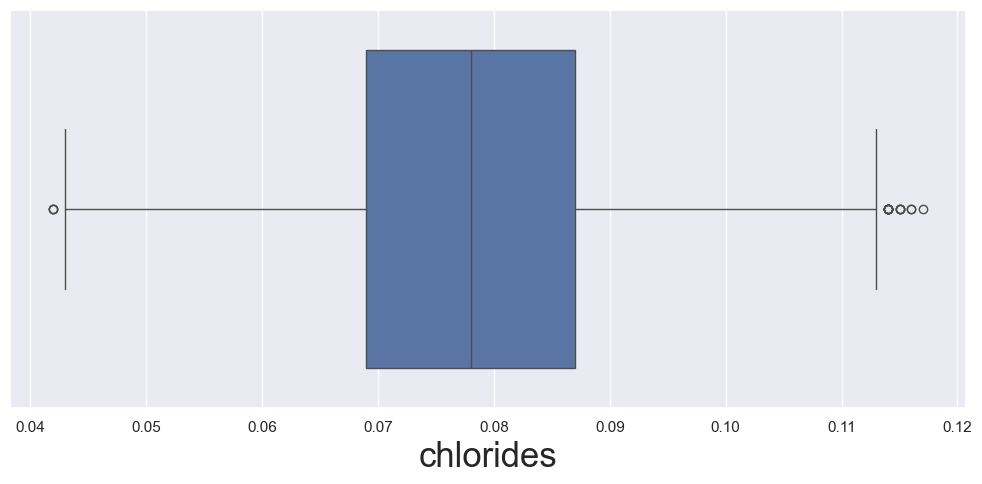

In [150]:
plt.figure(figsize=(10,5))
sns.boxplot(x='chlorides',data=data,color='b')
plt.xlabel('chlorides',fontsize=25)
plt.tight_layout()

In [152]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [154]:
outlier_handling('total sulfur dioxide')

'outliers removed'

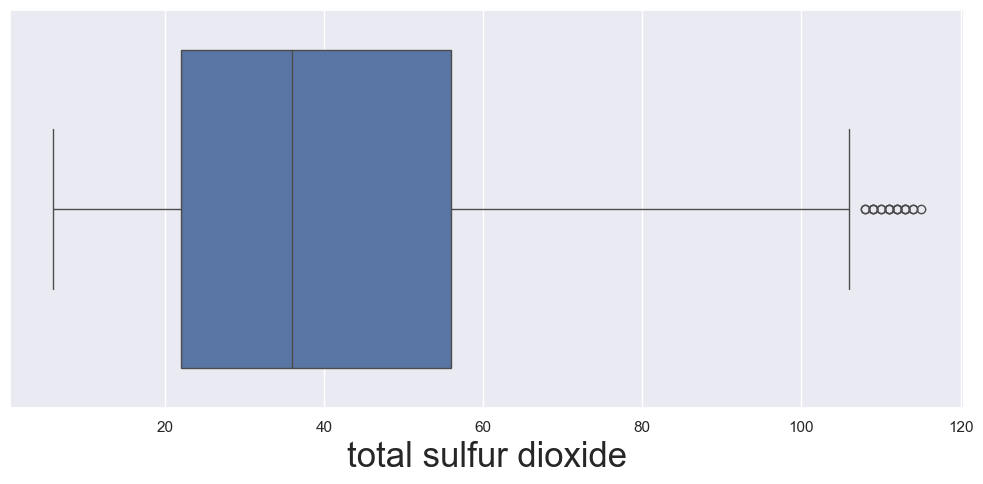

In [156]:
plt.figure(figsize=(10,5))
sns.boxplot(x='total sulfur dioxide',data=data,color='b')
plt.xlabel('total sulfur dioxide',fontsize=25)
plt.tight_layout()

In [158]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [160]:
outlier_handling('free sulfur dioxide')

'outliers removed'

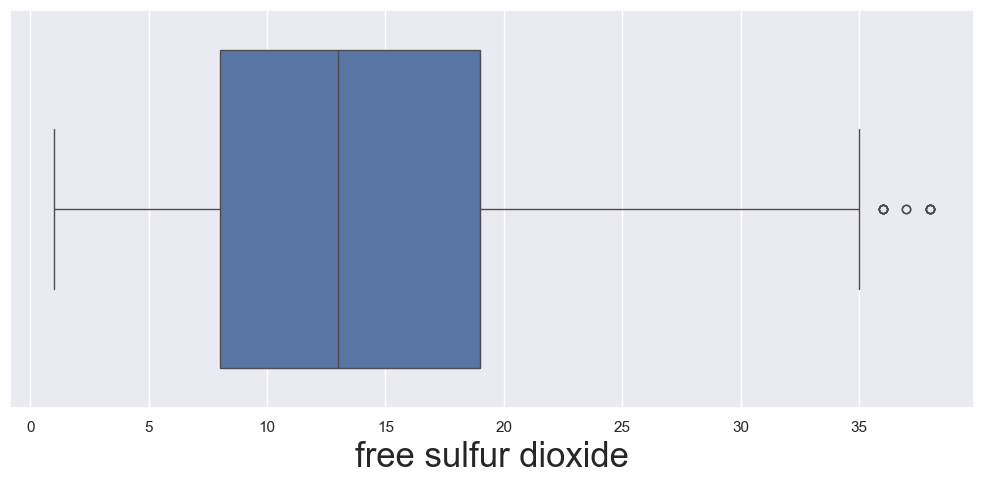

In [162]:
plt.figure(figsize=(10,5))
sns.boxplot(x='free sulfur dioxide',data=data,color='b')
plt.xlabel('free sulfur dioxide',fontsize=25)
plt.tight_layout()

In [164]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [166]:
outlier_handling('density')

'outliers removed'

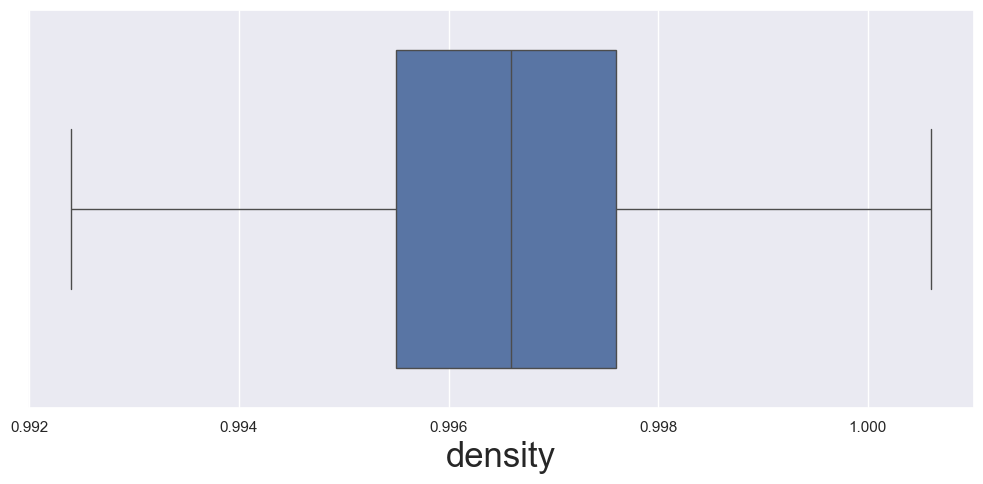

In [168]:
plt.figure(figsize=(10,5))
sns.boxplot(x='density',data=data,color='b')
plt.xlabel('density',fontsize=25)
plt.tight_layout()

In [170]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [172]:
outlier_handling('pH')

'outliers removed'

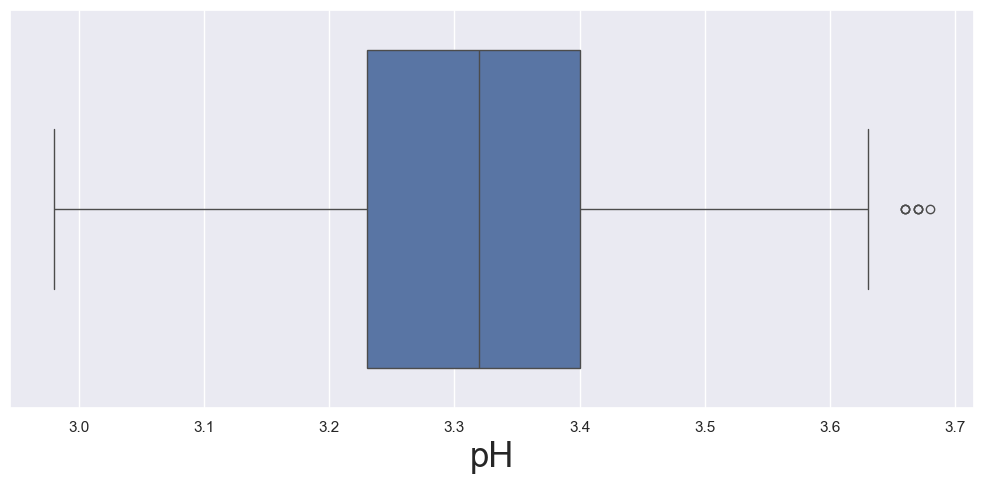

In [174]:
plt.figure(figsize=(10,5))
sns.boxplot(x='pH',data=data,color='b')
plt.xlabel('pH',fontsize=25)
plt.tight_layout()

In [176]:
def outlier_handling(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    outlier_values=list(data[(data[feature]>upper_fence) | (data[feature]<lower_fence)].index)
    data.drop(outlier_values,inplace=True)
    return 'outliers removed'

In [178]:
outlier_handling('sulphates')

'outliers removed'

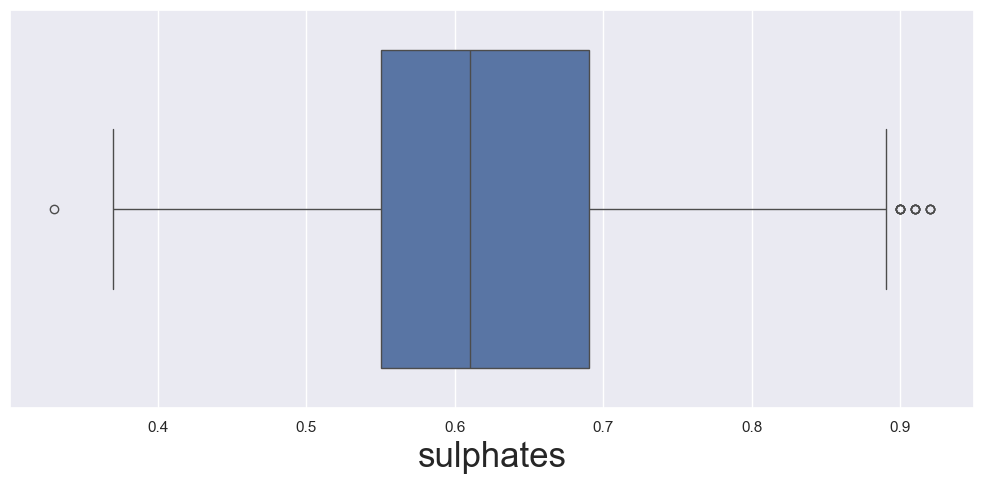

In [180]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sulphates',data=data,color='b')
plt.xlabel('sulphates',fontsize=25)
plt.tight_layout()

In [182]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

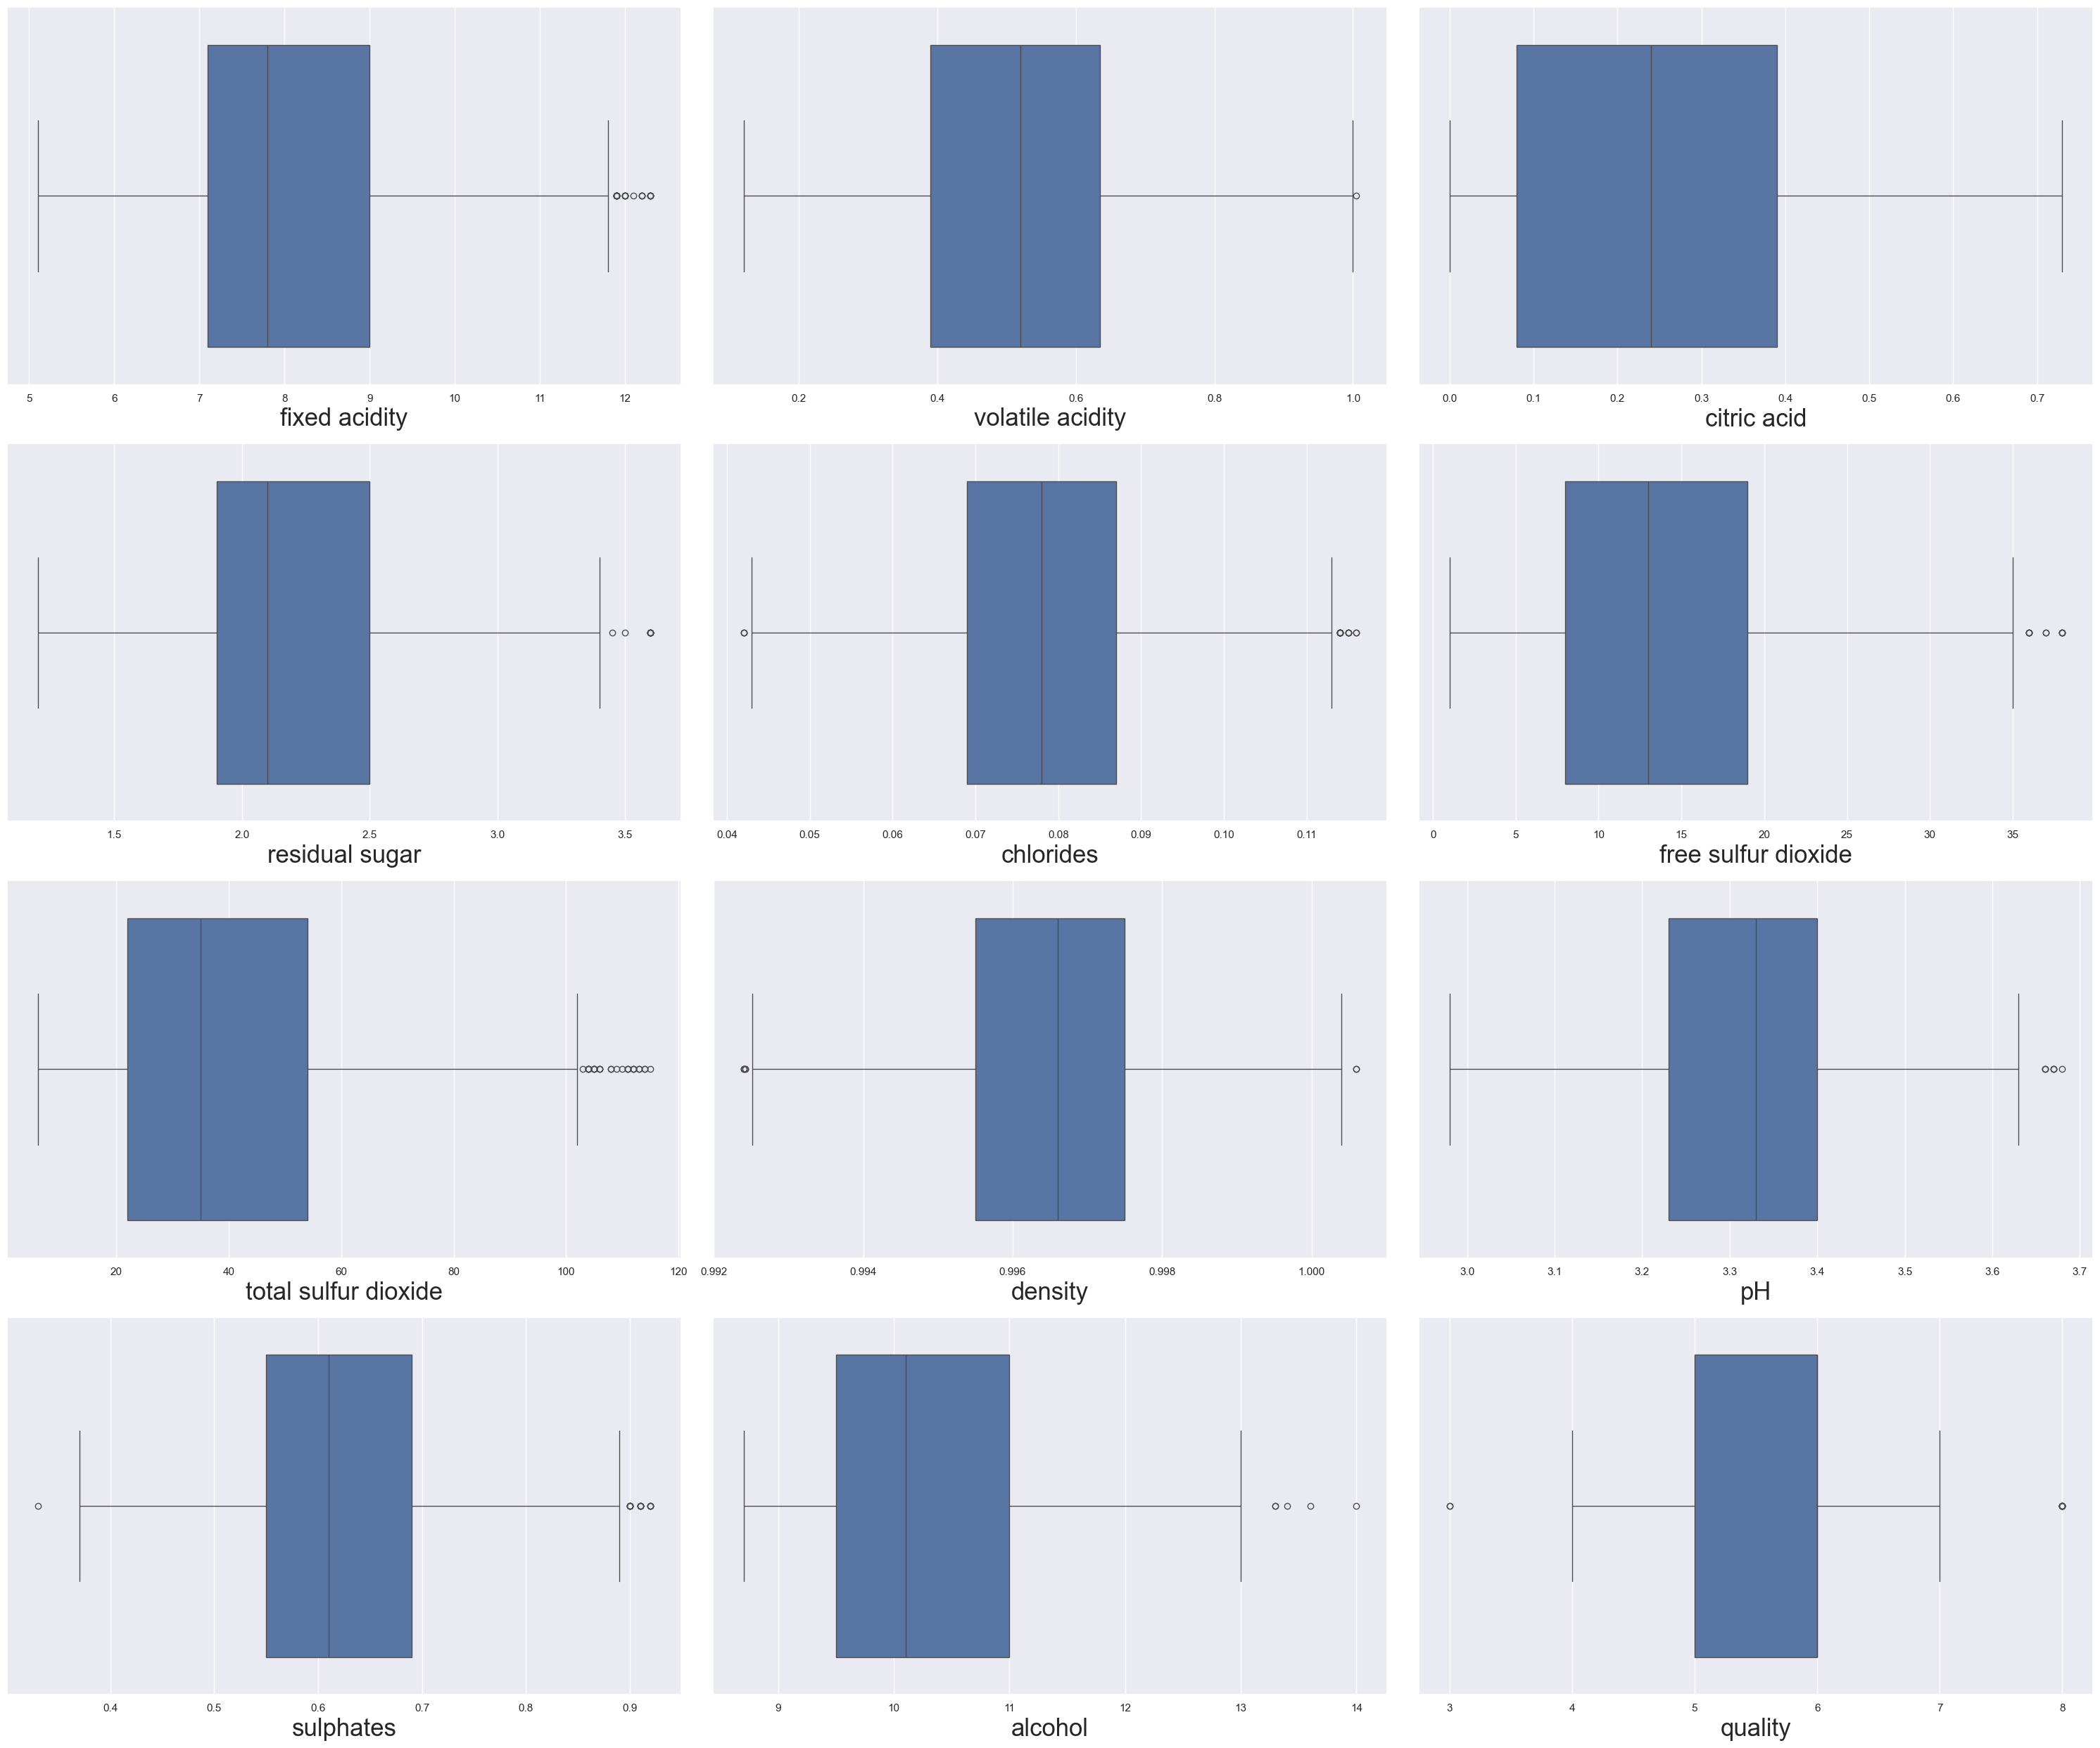

In [184]:
sns.set(rc={'figure.figsize':(30,25)})
pn=1
for features in data:
    plt.subplot(4,3,pn)
    sns.boxplot(x=features,data=data,color='b')
    pn+=1
    plt.xlabel(features,fontsize=25)
    plt.tight_layout()

In [186]:
data[data.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
27              7.9             0.430         0.21            1.60      0.106   
76              8.8             0.410         0.64            2.20      0.093   
93              7.7             0.490         0.26            1.90      0.062   
102             8.1             0.545         0.18            1.90      0.080   
105             8.1             0.575         0.22            2.10      0.077   
132             5.6             0.500         0.09            2.30      0.049   
140             8.4             0.745         0.11            1.90      0.090   
141             8.3             0.715         0.15            1.80      0.089   
153             7.5             0.600         0.03            1.80      0.095   
172             8.0             0.420         0.17            2.00      0.073   
176             7.3             0.380         0.21            2.00      0.080   
180             8.8             0.610         0.14            2.40      0.067   
194             7.6             0.550         0.21            2.20      0.071   
228             7.7             0.430         0.25            2.60      0.073   
233             6.9             0.520         0.25            2.60      0.081   
236             7.2             0.630         0.00            1.90      0.097   
238             7.2             0.630         0.00            1.90      0.097   
239             8.2             1.000         0.09            2.30      0.065   
254             7.1             0.600         0.00            1.80      0.074   
285             9.9             0.590         0.07            3.40      0.102   
290             8.7             0.520         0.09            2.50      0.091   
310            10.3             0.530         0.48            2.50      0.063   
319             9.6             0.770         0.12            2.90      0.082   
320             9.8             0.660         0.39            3.20      0.083   
382             8.3             0.260         0.42            2.00      0.080   
383             8.3             0.260         0.42            2.00      0.080   
398            11.5             0.590         0.59            2.60      0.087   
424             7.7             0.960         0.20            2.00      0.047   
425             6.6             0.840         0.03            2.30      0.059   
430            10.5             0.240         0.47            2.10      0.066   
435            12.3             0.390         0.63            2.30      0.091   
438            10.4             0.410         0.55            3.20      0.076   
450            11.9             0.390         0.69            2.80      0.095   
458            10.4             0.330         0.63            2.80      0.084   
478             9.6             0.680         0.24            2.20      0.087   
486            10.2             0.670         0.39            1.90      0.054   
498            10.7             0.350         0.53            2.60      0.070   
499             8.7             0.690         0.31            3.00      0.086   
500             7.8             0.520         0.25            1.90      0.081   
511            10.0             0.590         0.31            2.20      0.090   
514            10.5             0.510         0.64            2.40      0.107   
532            11.9             0.380         0.49            2.70      0.098   
535             9.1             0.220         0.24            2.10      0.078   
536             9.9             0.630         0.24            2.40      0.077   
571             6.2             0.360         0.24            2.20      0.095   
581            12.3             0.500         0.49            2.20      0.089   
592             9.0             0.450         0.49            2.60      0.084   
616             9.6             0.600

In [188]:
data.drop(list(data[data.duplicated()].index),inplace=True)

In [190]:
data[data.duplicated()]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [192]:
X=data.drop(columns='quality')

In [194]:
y=data['quality']
y

0       5
1       5
2       5
3       6
5       5
6       5
7       7
8       7
10      5
12      5
16      7
20      6
21      5
22      5
23      5
24      6
25      5
26      5
28      5
29      6
30      5
31      6
32      5
34      5
36      6
37      7
41      4
44      5
46      5
47      5
48      5
49      5
50      5
51      6
52      6
54      6
56      5
58      5
59      6
60      5
61      5
62      7
63      5
66      5
67      5
68      5
70      6
71      5
72      5
73      4
74      5
75      5
77      6
78      5
80      5
82      5
84      6
85      5
87      5
89      5
96      5
97      5
98      5
99      6
100     6
101     6
103     5
104     5
107     5
108     6
111     5
112     5
113     6
115     6
116     6
117     6
119     6
122     5
123     5
124     5
128     7
129     5
131     5
133     6
135     5
136     5
137     5
138     5
139     5
143     5
146     5
148     6
149     6
150     6
152     5
158     5
159     6
160     5
162     6
165     5


In [200]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [202]:
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.51752103,  1.05828647, -1.3745381 , ...,  1.43435206,
        -0.60520903, -0.98747149],
       [-0.24118392,  2.13224964, -1.3745381 , ..., -0.95497819,
         0.4894068 , -0.58628347],
       [-0.24118392,  1.41627419, -1.15278444, ..., -0.49252718,
         0.21575284, -0.58628347],
       ...,
       [-1.34653236,  0.46164026, -0.93103078, ...,  0.97190105,
        -0.42277306,  0.11579555],
       [-1.55378519,  0.73013105, -0.70927712, ...,  1.89680308,
         0.76306076, -0.18509546],
       [-1.48470091, -1.26863375,  1.23106741, ...,  0.50945003,
         0.30697083,  0.61728057]])

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y,test_size=0.33, random_state=50)

In [206]:
print(X_train.shape,y_train.shape) 

(643, 11) (643,)


In [208]:
from sklearn.svm import SVC
svc=SVC()

In [210]:
svc.fit(X_train,y_train)

SVC()

In [212]:
svc_predict=svc.predict(X_test)

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,svc_predict)

0.5911949685534591

In [216]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
grid=GridSearchCV(SVC(),parameters)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [218]:
grid.best_score_

0.6158187984496124